# Расчёт полей тороидально намагниченного цилиндра с намагниченностью обратной радиусу в опыте Дейны (опыт Николаева номер 31)

А.Ю.Дроздов

С.А. Дейна в ролике "Магниты Второе магнитное поле Николаева 4" https://www.youtube.com/watch?v=A2Lx-ONcMow (Текстовое писание ролика https://drive.google.com/file/d/0B-MmD2EU7WEbV3VCR0NvLXl6Rm8/view) представил опыт с взаимодействием двух соосно расположенных цилиндров со сверлением, тороидально намагничиваемых путём пропускания тока по проводу проходящему внутри сверлений.

Сама идея этого опыта принадлежит Г.Николаеву, который утверждал, что притяжения цилиндров противоречит классической электродинамике и для обьяснения притяжения цилиндров постулировал существование продольной силы Николаева, кроме традиционной силы Лоренца

В данной же работе, пользуясь матаппаратом классической электродинамики, я представляю расчёт полей тороидально намагниченного цилиндра, а также вычисляю силу их взаимодействия: силу Лоренца и силу Николаева. 

Вводим цилиндрическую систему координат, в которой (вслед за Таммом) индексом $j$ обозначаем координаты молекулярных токов намагниченного цилиндра, а индексом $a$ обозначаем координаты точек наблюдения

In [1]:
zj = var("zj")
za = var("za")
rj = var("rj")
ra = var("ra")
phi = var("phi")

assume(rj>0)
assume(ra>0)

Введём переменные - пределы интегрирования по координатам молекулярных токов

In [2]:
zj1 = var("zj1") # левый торец цилиндра
zj2 = var("zj2") # правый торец цилиндра

rj1 = var("rj1") # радиус внутренней поверхности (сверления) цилиндра
rj2 = var("rj2") # радиус внешней цилиндрической поверхности цилиндра

Задаём размеры цилиндров в сантиметрах. Размеры цилиндров: диаметр 30 мм, длина 30 мм, диаметр внутреннего сверления 6 мм.

In [3]:
# sizes of cylinders in Deyna's video
Zj1 = -1.5
Zj2 =  1.5
Rj1 = 0.3
Rj2 = 1.5

Ra1 = Rj1
Ra2 = Rj2

DZ = Zj2 - Zj1

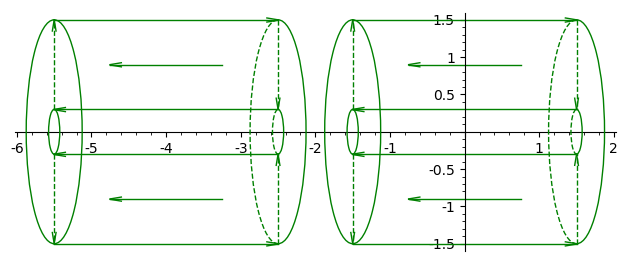

In [4]:
line_thick = 0.005
arr_l = 0.15
arr_h = 0.025
color = "green"

def draw_cylinder(z0 = 0):
    p  = line ([[z0 + Zj1,      Rj2                 ], [z0 + Zj2,Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,Rj2+arr_h           ], [z0 + Zj2,Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,Rj2-arr_h-line_thick], [z0 + Zj2,Rj2-line_thick]], color = color)

    p += line ([[z0 + Zj2,      Rj2                 ], [z0 + Zj2,Rj1]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj2-arr_h,Rj1+arr_l           ], [z0 + Zj2,Rj1]], color = color)
    p += line ([[z0 + Zj2+arr_h,Rj1+arr_l           ], [z0 + Zj2,Rj1]], color = color)

    p += line ([[z0 + Zj2,      Rj1                 ], [z0 + Zj1,Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,Rj1+arr_h           ], [z0 + Zj1,Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,Rj1-arr_h-line_thick], [z0 + Zj1,Rj1-line_thick]], color = color)

    p += line ([[z0 + Zj1,      Rj1                 ], [z0 + Zj1,Rj2]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj1-arr_h,Rj2-arr_l           ], [z0 + Zj1,Rj2]], color = color)
    p += line ([[z0 + Zj1+arr_h,Rj2-arr_l           ], [z0 + Zj1,Rj2]], color = color)

    p += line ([[z0 + Zj2-DZ/4,      (Rj1+Rj2)/2                 ], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,(Rj1+Rj2)/2+arr_h           ], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,(Rj1+Rj2)/2-arr_h-line_thick], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2-line_thick]], color = color)
    
    
    p += line ([[z0 + Zj1,      -Rj2                 ], [z0 + Zj2,-Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,-Rj2+arr_h           ], [z0 + Zj2,-Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,-Rj2-arr_h-line_thick], [z0 + Zj2,-Rj2-line_thick]], color = color)

    p += line ([[z0 + Zj2,      -Rj2                 ], [z0 + Zj2,-Rj1]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj2-arr_h,-Rj1-arr_l           ], [z0 + Zj2,-Rj1]], color = color)
    p += line ([[z0 + Zj2+arr_h,-Rj1-arr_l           ], [z0 + Zj2,-Rj1]], color = color)


    p += line ([[z0 + Zj2,      -Rj1                 ], [z0 + Zj1,-Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,-Rj1+arr_h           ], [z0 + Zj1,-Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,-Rj1-arr_h-line_thick], [z0 + Zj1,-Rj1-line_thick]], color = color)

    p += line ([[z0 + Zj1,      -Rj1                 ], [z0 + Zj1,-Rj2]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj1-arr_h,-Rj2+arr_l           ], [z0 + Zj1,-Rj2]], color = color)
    p += line ([[z0 + Zj1+arr_h,-Rj2+arr_l           ], [z0 + Zj1,-Rj2]], color = color)

    p += line ([[z0 + Zj2-DZ/4,      -(Rj1+Rj2)/2                 ], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,-(Rj1+Rj2)/2+arr_h           ], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,-(Rj1+Rj2)/2-arr_h-line_thick], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2-line_thick]], color = color)

    p += ellipse((z0 + Zj1, 0), (Rj1)/4, (Rj1), color = color)
    p += ellipse((z0 + Zj1, 0), (Rj2)/4, (Rj2), color = color)

    p += arc((z0 + Zj2, 0), (Rj1)/4, (Rj1), sector=(-pi/2,pi/2), color = color)
    p += arc((z0 + Zj2, 0), (Rj2)/4, (Rj2), sector=(-pi/2,pi/2), color = "green")

    p += arc((z0 + Zj2, 0), (Rj1)/4, (Rj1), sector=(pi/2,3*pi/2), color = color, linestyle="dashed")
    p += arc((z0 + Zj2, 0), (Rj2)/4, (Rj2), sector=(pi/2,3*pi/2), color = color, linestyle="dashed")
    
    return p

p = draw_cylinder()
p += draw_cylinder(z0 = -DZ-1.0)
p.show(aspect_ratio = 1, axes=True)

Следуя Тамму, обозначаем вектор намагниченности цилиндра через $I$. 
В данном расчёте предположим, что цилиндр имеет только $\varphi$-тую компоненту намагниченности и величина этой намагниченности $I_{\varphi}$ inverse to the radius.

$J$ ток on the wire

$\oint {\vec  H}\cdot {\vec  {dl}}={\frac  {4\pi}{c}}J$

$2\,\pi\,r\ {H_{\varphi}}_{wire}={\frac  {4\pi}{c}}J$

${H_{\varphi}}_{wire}={\frac  {2}{c\,r}}J$

$I_{\varphi} = \kappa\,{H_{\varphi}}_{wire}$

$I_{\varphi} = \kappa\,{\frac  {2}{c\,r}}J$

Для поверхностного тока у Тамма можно почерпнуть формулу $js = c \cdot [I \times n]$ (параграф 61. Векторный потенциал магнитного поля при наличии магнентиков. Средняя плотность объёмных и поверхностных токов. Уравнение 61.10 - случай для вакуума)
Для объёмного тока - формулу $jv = c \cdot rot(I)$ (там же, уравнение 61.9)

$js = c \cdot [I \times n] =  \kappa\,{\frac  {2}{r}}J$


In [5]:
c = var("c")         # скорость света
kappa = var("kappa") # Магнитная восприимчивость
J = var("J")         # ток
js(J, kappa, r) = 2*J*kappa/r  # плотность поверхностного тока на внутренней и внешней цилиндрической поверхностях цилиндра
                               # js(rj1) = - 2*J*kappa/rji
                               # js(rj2) = + 2*J*kappa/rj2
jt(J, kappa, r) = 2*J*kappa/r  # плотность поверхностного тока на торцах цилиндра
                               # jt(rj) = + 2*J*kappa/rj # zj1
                               # jt(rj) = - 2*J*kappa/rj # zj2
jv(J, kappa, r) = 0            # плотность объёмного тока

In [6]:
z_j = var("z_j")
z_a = var("z_a")
r_j = var("r_j")
r_a = var("r_a")
I_0 = var("I_0")  # намагниченность

Зная среднюю плотность объёмных и поверхностных токов можно вычислить векторный потенциал магнитного поля тороидально намагниченного цилиндра. Следуя Тамму

$A=\frac{1}{c}\int{\frac{j_v}{R}}d{V}+\frac{1}{c}\int{\frac{j_s}{R}}d{S}$

Распишем в этом интеграле отдельно интегрирование по торцам и по цилиндрическим поверхностям

$A=\frac{1}{c}\int{\frac{j_v}{R}}d{V}+\frac{1}{c}\int{\frac{j_s}{R}}d{S_{s}}+\frac{1}{c}\int{\frac{j_t}{R}}d{S_{t}}$

В цилиндрической системе координат интегрирование по объёму цилиндра

$A_V=\frac{1}{c}\int{\frac{j_v}{R}}d{V}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}d{{r}_{j}}$

интегрирование по цилиндрическим поверхностям цилиндра

$A_S=\frac{1}{c}\int{\frac{j_s}{R}}d{S_{s}}=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}$

интегрирование по торцевым поверхностям цилиндра

$A_T=\frac{1}{c}\int{\frac{j_t}{R}}d{S_{t}}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

Во всех этих трёх интегралах нам потребуется интеграл $\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi}$ - обратного расстояния между точкой истока и точкой наблюдения в цилиндрической системе координат, проинтегрированный по координатному углу phi точек истока от нуля до $2\pi$

$R=\sqrt{(r_j\,sin(\varphi_j)-r_a\,sin(\varphi_a))^2+(r_j\,cos(\varphi_j)-r_a\,cos(\varphi_a))^2+(z_j-z_a)^2}$

Ввиду цилиндрической симметрии и ввиду того что

$\frac{\partial A}{\partial \varphi_a} = 0$

нам не потребуется дифференцирование векторного потенциала по $\varphi_a$ координате точек наблюдения, можно упростить расчёт полагая, что $\varphi_a = 0$, тогда 

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

В таком случае интеграл 
$IR_{\varphi}=\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi_j}$
выражается через полный эллиптический интеграл первого рода следующим образом:

In [7]:
from IPython.display import display, Math, Latex

rja2   = lambda rj, ra, zj, za : (rj-ra)^2+(zj-za)^2
module = lambda rj, ra, zj, za : - 4*rj*ra / rja2(rj, ra, zj, za)
IRphi  = lambda rj, ra, zj, za : 4*elliptic_kc(module(rj, ra, zj, za)) / sqrt(rja2(rj, ra, zj, za))
display(Math("$$IR_{\\varphi} =" + latex(IRphi(rj, r_a, z_j, z_a)) + "$$"))

<IPython.core.display.Math object>

In [8]:
phi_j = var("phi_j")
Rja2       = lambda rj, ra, zj, za, phi_j : rj^2 + ra^2 - 2*rj*ra*cos(phi_j) + (zj-za)^2
one_per_R  = lambda rj, ra, zj, za, phi_j : 1 / sqrt(Rja2(rj, ra, zj, za, phi_j))
IRphi_     = lambda rj, ra, zj, za : integrate(one_per_R(rj, ra, zj, za, phi_j),(phi_j,0,2*pi))
display(Math("$$IR_{\\varphi} =" + latex(IRphi(r_j, r_a, z_j, z_a)) + "$$"))

<IPython.core.display.Math object>

In [9]:
z_j1 = var("z_j1") # левый торец цилиндра
z_j2 = var("z_j2") # правый торец цилиндра

r_j1 = var("r_j1") # радиус внутренней поверхности (сверления) цилиндра
r_j2 = var("r_j2") # радиус внешней цилиндрической поверхности цилиндра

вспомогательные переменные для интегрирования источников векторного потенциала по поверхностным и объёмным токам

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементарным объёмом ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}d{z_j}$ цилиндра

$A_v=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{z_j}$ цилиндрической поверхности цилиндра

$A_s=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}$  торцевой поверхности цилиндра

$A_t=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [10]:
As = lambda J, c, kappa, rj, ra, zj, za : IRphi(rj, ra, zj, za) * js(J, kappa, rj)*rj/c
display(Math("$$A_s =" + latex(As(J, c, kappa, r_j, r_a, z_j, z_a)) + "$$"))

At = lambda J, c, kappa, rj, ra, zj, za : IRphi(rj, ra, zj, za) * jt(J, kappa, rj)*rj/c
display(Math("$$A_t =" + latex(At(J, c, kappa, r_j, r_a, z_j, z_a)) + "$$"))

Av = lambda J, c, kappa, rj, ra, zj, za : IRphi(rj, ra, zj, za) * jv(J, kappa, rj)*rj/c
display(Math("$$A_v =" + latex(Av(J, c, kappa, r_j, r_a, z_j, z_a)) + "$$"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_t = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [11]:
At_diff_za_ = lambda J, c, kappa, rj, ra, zj, za : diff(At(J, c, kappa, rj, ra, zj, za), za)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $z_a$ координате точки наблюдения

In [12]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_t(J, c, \\kappa, r_j, r_a, z_j, z_a) = " + latex(At_diff_za_(J, c, kappa, r_j, r_a, z_j, z_a)) + "$$"))

<IPython.core.display.Math object>

In [13]:
exec(preparse("At_diff_za = lambda J, c, kappa, rj, ra, zj, za : " + str(At_diff_za_(J, c, kappa, rj, ra, zj, za))))

In [14]:
print (At_diff_za(J, c, kappa, rj, ra, zj, za))

-8*J*kappa*(za - zj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/(((ra - rj)^2 + (za - zj)^2)^(3/2)*c) + 8*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*J*kappa*(za - zj)/(((ra - rj)^2 + (za - zj)^2)^(3/2)*c*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))


In [15]:
display(Math(latex(At_diff_za (J, c, kappa, r_j, r_a, z_j, z_a))))

<IPython.core.display.Math object>

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [16]:
At2_diff_za_ = lambda J, c, kappa, rj, ra, zj1, zj2, za : At_diff_za_(J, c, kappa, rj, ra, zj1, za) - At_diff_za_(J, c, kappa, rj, ra, zj2, za)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $z$ координате точки наблюдения

In [17]:
exec(preparse("At2_diff_za = lambda J, c, kappa, rj, ra, zj1, zj2, za : " + str(At2_diff_za_(J, c, kappa, rj, ra, zj1, zj2, za))))

In [18]:
print(At2_diff_za (J, c, kappa, rj, ra, zj1, zj2, za))

-8*J*kappa*(za - zj1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/(((ra - rj)^2 + (za - zj1)^2)^(3/2)*c) + 8*J*kappa*(za - zj2)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/(((ra - rj)^2 + (za - zj2)^2)^(3/2)*c) + 8*((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))*J*kappa*(za - zj1)/(((ra - rj)^2 + (za - zj1)^2)^(3/2)*c*(4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)) - 8*((4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)))*J*kappa*(za - zj2)/(((ra - rj)^2 + (za - zj2)^2)^(3/2)*c*(4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1))


In [19]:
display(Math(latex(At2_diff_za (J, c, kappa, r_j, r_a, z_j1, z_j2, z_a))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $r_a$ координате точки наблюдения $\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_t\right) = \frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}\right)$

In [20]:
At_ra_diff_ra_div_ra_ = lambda J, c, kappa, rj, ra, zj, za : (ra*At(J, c, kappa, rj, ra, zj, za)).diff(ra)/ra

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $r_a$ координате точки наблюдения

In [21]:
display(Math("$$\\frac{1}{r_a}\\frac{\\partial}{\\partial r_a}\\left(r_a\\, A_t(J, c, \\kappa, r_j, r_a, z_j, z_a)\\right) = " + latex(At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj, za)) + "$$"))

<IPython.core.display.Math object>

In [22]:
exec(preparse("At_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj, za : " + str(At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj, za))))

In [23]:
print (At_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj, za))

-4*(2*J*kappa*(ra - rj)*ra*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/(((ra - rj)^2 + (za - zj)^2)^(3/2)*c) - sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*J*kappa*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(c*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*rj) - 2*J*kappa*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/(sqrt((ra - rj)^2 + (za - zj)^2)*c))/ra


In [24]:
display(Math(latex(At_ra_diff_ra_div_ra (J, c, kappa, r_j, r_a, z_j, z_a))))

<IPython.core.display.Math object>

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [25]:
At2_ra_diff_ra_div_ra_ = lambda J, c, kappa, rj, ra, zj1, zj2, za : At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj1, za) - At_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj2, za)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $r$ координате точки наблюдения

In [26]:
exec(preparse("At2_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj1, zj2, za : " + str(At2_ra_diff_ra_div_ra_(J, c, kappa, rj, ra, zj1, zj2, za))))

In [27]:
print(At2_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj1, zj2, za))

-4*(2*J*kappa*(ra - rj)*ra*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/(((ra - rj)^2 + (za - zj1)^2)^(3/2)*c) - sqrt((ra - rj)^2 + (za - zj1)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))*J*kappa*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj1)^2)^2 - rj/((ra - rj)^2 + (za - zj1)^2))/(c*(4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*rj) - 2*J*kappa*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/(sqrt((ra - rj)^2 + (za - zj1)^2)*c))/ra + 4*(2*J*kappa*(ra - rj)*ra*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/(((ra - rj)^2 + (za - zj2)^2)^(3/2)*c) - sqrt((ra - rj)^2 + (za - zj2)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)))*J*kappa*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj2)^2)^2 - rj/((ra - rj)^2 + (za - zj2)^2))/(c*(4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1)*rj) - 2*J*k

In [28]:
display(Math(latex(At2_ra_diff_ra_div_ra (J, c, kappa, r_j, r_a, z_j1, z_j2, z_a))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_s = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [29]:
As_diff_ra_ = lambda J, c, kappa, rj, ra, zj, za : As(J, c, kappa, rj, ra, zj, za).diff(ra)

Итак, производная векторного потенциала, создаваемого поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [30]:
display(Math("$$\\frac{\\partial}{\\partial r_a} A_s (J, c, \\kappa, r_j, r_a, z_j, z_a) = " + latex(As_diff_ra_(J, c, kappa, rj, ra, zj, za)) + "$$"))

<IPython.core.display.Math object>

In [31]:
exec(preparse("As_diff_ra = lambda J, c, kappa, rj, ra, zj, za : " + str(As_diff_ra_(J, c, kappa, rj, ra, zj, za))))

In [32]:
print(As_diff_ra (J, c, kappa, rj, ra, zj, za))

-8*J*kappa*(ra - rj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/(((ra - rj)^2 + (za - zj)^2)^(3/2)*c) + 4*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*J*kappa*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(c*ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*rj)


In [33]:
display(Math(latex(As_diff_ra (J, c, kappa, r_j, r_a, z_j, z_a))))

<IPython.core.display.Math object>

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [34]:
As2_diff_ra_ = lambda J, c, kappa, rj1, rj2, ra, zj, za : - As_diff_ra_(J, c, kappa, rj1, ra, zj, za) + As_diff_ra_(J, c, kappa, rj2, ra, zj, za)


Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [35]:
exec(preparse("As2_diff_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za : " + str(As2_diff_ra_(J, c, kappa, rj1, rj2, ra, zj, za))))

In [36]:
print (As2_diff_ra (J, c, kappa, rj1, rj2, ra, zj, za))

8*J*kappa*(ra - rj1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/(((ra - rj1)^2 + (za - zj)^2)^(3/2)*c) - 8*J*kappa*(ra - rj2)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/(((ra - rj2)^2 + (za - zj)^2)^(3/2)*c) - 4*sqrt((ra - rj1)^2 + (za - zj)^2)*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*J*kappa*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))/(c*ra*(4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*rj1) + 4*sqrt((ra - rj2)^2 + (za - zj)^2)*((4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)))*J*kappa*(2*(ra - rj2)*ra*rj2/((ra - rj2)^2 + (za - zj)^2)^2 - rj2/((ra - rj2)^2 + (za - zj)^2))/(c*ra*(4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*rj2)


In [37]:
display(Math(latex(As2_diff_ra (J, c, kappa, r_j1, r_j2, r_a, z_j, z_a))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_s = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [38]:
As_diff_za_ = lambda J, c, kappa, rj, ra, zj, za : As(J, c, kappa, rj, ra, zj, za).diff(za)

Итак, производная векторного потенциала, создаваемого поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $z$ координате точки наблюдения

In [39]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_s (J, c, \\kappa, r_j, r_a, z_j, z_a) = " + latex(As_diff_za_(J, c, kappa, rj, ra, zj, za)) + "$$"))

<IPython.core.display.Math object>

In [40]:
exec(preparse("As_diff_za = lambda J, c, kappa, rj, ra, zj, za : " + str(As_diff_za_(J, c, kappa, rj, ra, zj, za))))

In [41]:
print(As_diff_za (J, c, kappa, rj, ra, zj, za))

-8*J*kappa*(za - zj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/(((ra - rj)^2 + (za - zj)^2)^(3/2)*c) + 8*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*J*kappa*(za - zj)/(((ra - rj)^2 + (za - zj)^2)^(3/2)*c*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))


In [42]:
display(Math(latex(As_diff_za (J, c, kappa, r_j, r_a, z_j, z_a))))

<IPython.core.display.Math object>

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [43]:
As2_diff_za_ = lambda J, c, kappa, rj1, rj2, ra, zj, za : - As_diff_za_(J, c, kappa, rj1, ra, zj, za) + As_diff_za_(J, c, kappa, rj2, ra, zj, za)


Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $z$ координате точки наблюдения

In [44]:
exec(preparse("As2_diff_za = lambda J, c, kappa, rj1, rj2, ra, zj, za : " + str(As2_diff_za_(J, c, kappa, rj1, rj2, ra, zj, za))))

In [45]:
print (As2_diff_za (J, c, kappa, rj1, rj2, ra, zj, za))

8*J*kappa*(za - zj)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/(((ra - rj1)^2 + (za - zj)^2)^(3/2)*c) - 8*J*kappa*(za - zj)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/(((ra - rj2)^2 + (za - zj)^2)^(3/2)*c) - 8*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*J*kappa*(za - zj)/(((ra - rj1)^2 + (za - zj)^2)^(3/2)*c*(4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)) + 8*((4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)))*J*kappa*(za - zj)/(((ra - rj2)^2 + (za - zj)^2)^(3/2)*c*(4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1))


In [46]:
display(Math(latex(As2_diff_za (J, c, kappa, r_j1, r_j2, r_a, z_j, z_a))))

<IPython.core.display.Math object>

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_v = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [47]:
Av_diff_ra_ = lambda J, c, kappa, rj, ra, zj, za : Av(J, c, kappa, rj, ra, zj, za).diff(ra)

Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $r$ координате точки наблюдения

In [48]:
display(Math("$$\\frac{\\partial}{\\partial r_a} A_v (J, c, \\kappa, r_j, r_a, z_j, z_a) =" + latex(Av_diff_ra_(J, c, kappa, rj, ra, zj, za)) + "$$"))

<IPython.core.display.Math object>

In [49]:
exec(preparse("Av_diff_ra = lambda J, c, kappa, rj, ra, zj, za : " + str(Av_diff_ra_(J, c, kappa, rj, ra, zj, za))))

In [50]:
print (Av_diff_ra (J, c, kappa, rj, ra, zj, za))

0


In [51]:
display(Math(latex(Av_diff_ra (J, c, kappa, rj, ra, zj, za))))

<IPython.core.display.Math object>

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_v = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [52]:
Av_diff_za_ = lambda J, c, kappa, rj, ra, zj, za : Av(J, c, kappa, rj, ra, zj, za).diff(za)


Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $z$ координате точки наблюдения

In [53]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_v (J, c, \\kappa, r_j, r_a, z_j, z_a) =" + latex(Av_diff_za_(J, c, kappa, rj, ra, zj, za)) + "$$"))

<IPython.core.display.Math object>

In [54]:
exec(preparse("Av_diff_za = lambda J, c, kappa, rj, ra, zj, za : " + str(Av_diff_za_(J, c, kappa, rj, ra, zj, za))))

In [55]:
print (Av_diff_za (J, c, kappa, rj, ra, zj, za))

0


In [56]:
display(Math(latex(Av_diff_za (J, c, kappa, r_j, r_a, z_j, z_a))))

<IPython.core.display.Math object>

Далее нам необходимо определить собственную функцию для численного интегрирования

In [57]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $r$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

$\frac{\partial}{\partial r_a}\int\limits_{r_{j1}}^{r_{j2}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

In [58]:
AV_diff_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra(J, c, kappa, rj, ra, zj, za), rj1, rj2)

Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $z$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

$\frac{\partial}{\partial z_a}\int\limits_{r_{j1}}^{r_{j2}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

In [59]:
AV_diff_za = lambda J, c, kappa, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_za(J, c, kappa, rj, ra, zj, za), rj1, rj2)

Производим подстановку размеров координат правого цилиндра - источника векторного потенциала в формулы производных векторного потенциала

In [60]:
# численные значения в системе гаусса
J_d = 250 * 3*10^9      # Ток в цепи достигает 250 А
kappa_d = 1100 / (4*pi) # Магнитная восприимчивость https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%82%D0%BD%D0%B0%D1%8F_%D0%B2%D0%BE%D1%81%D0%BF%D1%80%D0%B8%D0%B8%D0%BC%D1%87%D0%B8%D0%B2%D0%BE%D1%81%D1%82%D1%8C
c_d = 299792458 * 100

In [61]:
At_diff_za_subs_zj = lambda rj, ra, za : At2_diff_za(J_d, c_d, kappa_d, rj, ra, Zj1, Zj2, za)

In [62]:
At_ra_diff_ra_div_ra_subs_zj = lambda rj, ra, za : At2_ra_diff_ra_div_ra (J_d, c_d, kappa_d, rj, ra, Zj1, Zj2, za)

In [63]:
As_diff_ra_subs_rj = lambda ra, zj, za : As2_diff_ra(J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)

In [64]:
As_diff_za_subs_rj = lambda ra, zj, za : As2_diff_za(J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)

In [65]:
Av_diff_ra_subs_rj = lambda ra, zj, za : AV_diff_ra (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)

In [66]:
Av_diff_za_subs_rj = lambda ra, zj, za : AV_diff_za (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)

Определяем функцию расчёта векторного магнитного поля $H$ (компонента $\varphi$)

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

In [67]:
def calc_H_phi(Za, Ra):
    At_diff_za_subs_zj_za_ra = lambda rj : At_diff_za_subs_zj(rj, Ra, Za)
    As_diff_ra_subs_rj_za_ra = lambda zj : As_diff_ra_subs_rj(Ra, zj, Za)

    At_diff_za_num_int = At_diff_za_subs_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_num_int = As_diff_ra_subs_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_num_int = num_int( lambda zj : Av_diff_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_num_int = As_diff_ra_num_int[0] + Av_diff_ra_num_int

    H_phi_t = At_diff_za_num_int[0]
    H_phi_sv = - As_v_diff_ra_num_int

    H_phi = H_phi_t + H_phi_sv
    print ("Ra =", Ra, "Za =", Za, "H_phi_t =", H_phi_t)
    print ("Ra =", Ra, "Za =", Za, "H_phi_sv =", H_phi_sv)
    print ("Ra =", Ra, "Za =", Za, "H_phi =", H_phi)

    return (H_phi, H_phi_t, H_phi_sv)

Определяем функцию расчёта скалярного магнитного поля $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

In [68]:
def calc_H_scalar(Za, Ra):
    At_ra_diff_ra_div_ra_subs_zj_za_ra = lambda rj : At_ra_diff_ra_div_ra_subs_zj(rj, Ra, Za)
    As_diff_za_subs_rj_za_ra = lambda zj : As_diff_za_subs_rj(Ra, zj, Za)

    At_ra_diff_ra_div_ra_num_int = At_ra_diff_ra_div_ra_subs_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_za_num_int = As_diff_za_subs_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_za_num_int = num_int( lambda zj : Av_diff_za_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_za_num_int = As_diff_za_num_int[0] + Av_diff_za_num_int

    H_scalar_t = - At_ra_diff_ra_div_ra_num_int[0]
    H_scalar_sv = - As_v_diff_za_num_int

    H_scalar = H_scalar_t + H_scalar_sv
    print ("Ra =", Ra, "Za =", Za, "H_scalar_t =", H_scalar_t)
    print ("Ra =", Ra, "Za =", Za, "H_scalar_sv =", H_scalar_sv)
    print ("Ra =", Ra, "Za =", Za, "H_scalar =", H_scalar)

    return (H_scalar, H_scalar_t, H_scalar_sv)

Запуск расчёта величины магнитного поля $H_{\varphi}$ для заданного набора значений зазора между цилиндрами

In [69]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = Rj2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Ra = 1.50000000000000 Za = -1.51000000000000 H_phi_t = 6796.433458680833
Ra = 1.50000000000000 Za = -1.51000000000000 H_phi_sv = -8788.395448815425
Ra = 1.50000000000000 Za = -1.51000000000000 H_phi = -1991.9619901345923
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi_t = 6853.887789511206
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi_sv = -8777.075982259472
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi = -1923.1881927482655
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi_t = 6900.672629213725
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi_sv = -8755.56443517534
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi = -1854.8918059616153
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi_t = 6940.360435637192
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi_sv = -8727.45016153261
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi = -1787.0897258954183
Ra = 1.50000000000000 Za = -1.55000000000000 H_phi_t = 6974.650267594498
Ra = 1.50000000000000 Za = -1.55000000000000 

Результирующий график scalar магнитного поля $H_{\varphi}$ (эрстед) на расстоянии Ra = 1.5 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

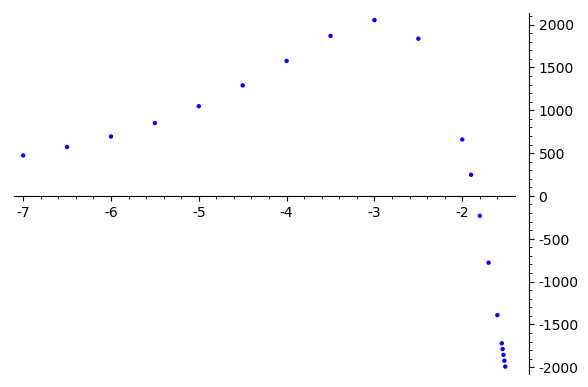

In [70]:
list_plot(plot_data_h_phi).show()

In [71]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = Rj1
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Ra = 0.300000000000000 Za = -1.51000000000000 H_phi_t = 40946.47150601678
Ra = 0.300000000000000 Za = -1.51000000000000 H_phi_sv = -43065.27136398743
Ra = 0.300000000000000 Za = -1.51000000000000 H_phi = -2118.7998579706473
Ra = 0.300000000000000 Za = -1.52000000000000 H_phi_t = 39813.42037119376
Ra = 0.300000000000000 Za = -1.52000000000000 H_phi_sv = -41062.22859285631
Ra = 0.300000000000000 Za = -1.52000000000000 H_phi = -1248.808221662548
Ra = 0.300000000000000 Za = -1.53000000000000 H_phi_t = 38895.13881481952
Ra = 0.300000000000000 Za = -1.53000000000000 H_phi_sv = -39314.99970223841
Ra = 0.300000000000000 Za = -1.53000000000000 H_phi = -419.860887418894
Ra = 0.300000000000000 Za = -1.54000000000000 H_phi_t = 38105.38707264679
Ra = 0.300000000000000 Za = -1.54000000000000 H_phi_sv = -37734.66581022233
Ra = 0.300000000000000 Za = -1.54000000000000 H_phi = 370.72126242445665
Ra = 0.300000000000000 Za = -1.55000000000000 H_phi_t = 37404.18866883263
Ra = 0.300000000000000 Za = -1.550

Результирующий график scalar магнитного поля $H_{\varphi}$ (эрстед) на расстоянии Ra = 0.3 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

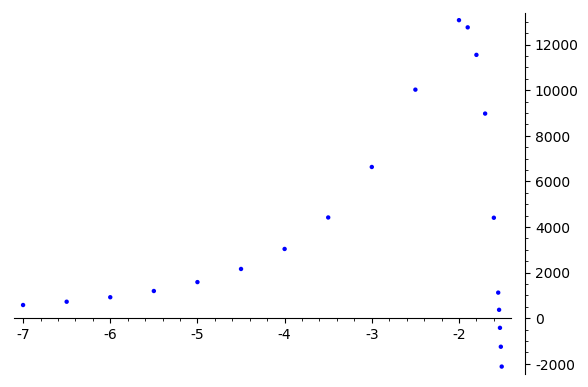

In [72]:
list_plot(plot_data_h_phi).show()

In [73]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_t = 27469.95974880026
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_sv = -29833.15605713167
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi = -2363.1963083314113
Ra = 0.900000000000000 Za = -1.52000000000000 H_phi_t = 27255.54272371349
Ra = 0.900000000000000 Za = -1.52000000000000 H_phi_sv = -29405.08979962322
Ra = 0.900000000000000 Za = -1.52000000000000 H_phi = -2149.5470759097298
Ra = 0.900000000000000 Za = -1.53000000000000 H_phi_t = 27037.70089258892
Ra = 0.900000000000000 Za = -1.53000000000000 H_phi_sv = -28977.4842103226
Ra = 0.900000000000000 Za = -1.53000000000000 H_phi = -1939.7833177336797
Ra = 0.900000000000000 Za = -1.54000000000000 H_phi_t = 26816.67186443162
Ra = 0.900000000000000 Za = -1.54000000000000 H_phi_sv = -28550.58984049333
Ra = 0.900000000000000 Za = -1.54000000000000 H_phi = -1733.917976061708
Ra = 0.900000000000000 Za = -1.55000000000000 H_phi_t = 26592.69479649318
Ra = 0.900000000000000 Za = -1.5

Результирующий график scalar магнитного поля $H_{\varphi}$ (эрстед) на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

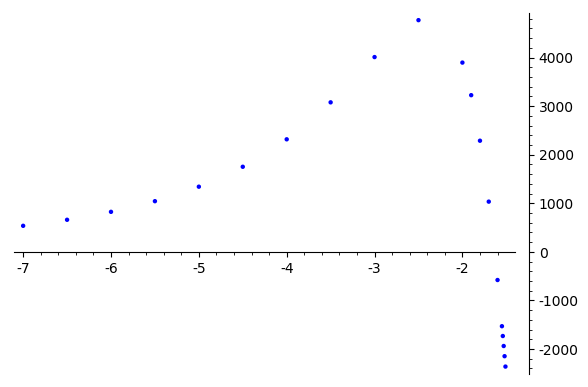

In [74]:
list_plot(plot_data_h_phi).show()

Запуск расчёта величины scalar магнитного поля для заданного набора значений зазора между цилиндрами

In [75]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = Rj2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Ra = 1.50000000000000 Za = -1.51000000000000 H_scalar_t = 25256.41205594242
Ra = 1.50000000000000 Za = -1.51000000000000 H_scalar_sv = -23393.15305463733
Ra = 1.50000000000000 Za = -1.51000000000000 H_scalar = 1863.2590013050904
Ra = 1.50000000000000 Za = -1.52000000000000 H_scalar_t = 21199.82239744777
Ra = 1.50000000000000 Za = -1.52000000000000 H_scalar_sv = -19343.32886140045
Ra = 1.50000000000000 Za = -1.52000000000000 H_scalar = 1856.493536047321
Ra = 1.50000000000000 Za = -1.53000000000000 H_scalar_t = 18823.13462331289
Ra = 1.50000000000000 Za = -1.53000000000000 H_scalar_sv = -16974.27329231974
Ra = 1.50000000000000 Za = -1.53000000000000 H_scalar = 1848.8613309931497
Ra = 1.50000000000000 Za = -1.54000000000000 H_scalar_t = 17134.25919358545
Ra = 1.50000000000000 Za = -1.54000000000000 H_scalar_sv = -15293.83579278518
Ra = 1.50000000000000 Za = -1.54000000000000 H_scalar = 1840.4234008002713
Ra = 1.50000000000000 Za = -1.55000000000000 H_scalar_t = 15822.31585099351
Ra = 1.50

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 1.5 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

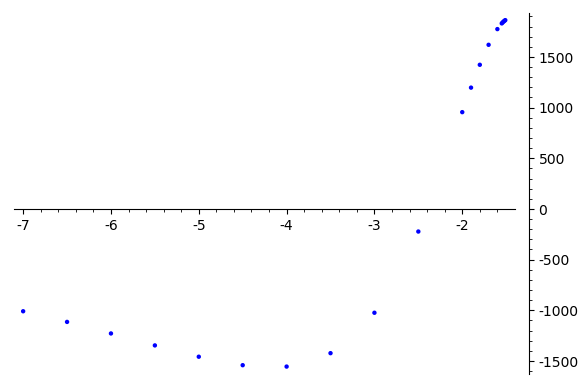

In [76]:
list_plot(plot_data_h_scalar).show()

In [77]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = Rj1
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Ra = 0.300000000000000 Za = -1.51000000000000 H_scalar_t = -200213.9323196107
Ra = 0.300000000000000 Za = -1.51000000000000 H_scalar_sv = 140590.910874533
Ra = 0.300000000000000 Za = -1.51000000000000 H_scalar = -59623.0214450777
Ra = 0.300000000000000 Za = -1.52000000000000 H_scalar_t = -180005.3472634387
Ra = 0.300000000000000 Za = -1.52000000000000 H_scalar_sv = 120339.5129353194
Ra = 0.300000000000000 Za = -1.52000000000000 H_scalar = -59665.83432811931
Ra = 0.300000000000000 Za = -1.53000000000000 H_scalar_t = -168170.4247420693
Ra = 0.300000000000000 Za = -1.53000000000000 H_scalar_sv = 108479.5162345284
Ra = 0.300000000000000 Za = -1.53000000000000 H_scalar = -59690.908507540895
Ra = 0.300000000000000 Za = -1.54000000000000 H_scalar_t = -159754.5713521674
Ra = 0.300000000000000 Za = -1.54000000000000 H_scalar_sv = 100051.8442008525
Ra = 0.300000000000000 Za = -1.54000000000000 H_scalar = -59702.7271513149
Ra = 0.300000000000000 Za = -1.55000000000000 H_scalar_t = -153207.0049683

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 0.3 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

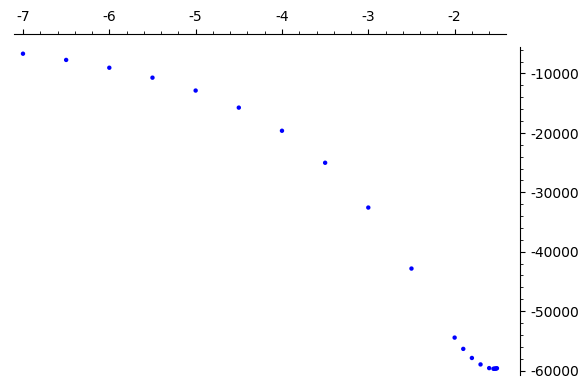

In [78]:
list_plot(plot_data_h_scalar).show()

In [79]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar_t = -12115.8550739229
Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar_sv = 10290.14212386148
Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar = -1825.7129500614192
Ra = 0.900000000000000 Za = -1.52000000000000 H_scalar_t = -12140.91882668701
Ra = 0.900000000000000 Za = -1.52000000000000 H_scalar_sv = 10291.84406826903
Ra = 0.900000000000000 Za = -1.52000000000000 H_scalar = -1849.074758417979
Ra = 0.900000000000000 Za = -1.53000000000000 H_scalar_t = -12165.20875919623
Ra = 0.900000000000000 Za = -1.53000000000000 H_scalar_sv = 10290.76216073215
Ra = 0.900000000000000 Za = -1.53000000000000 H_scalar = -1874.4465984640792
Ra = 0.900000000000000 Za = -1.54000000000000 H_scalar_t = -12188.65332497554
Ra = 0.900000000000000 Za = -1.54000000000000 H_scalar_sv = 10286.90912145323
Ra = 0.900000000000000 Za = -1.54000000000000 H_scalar = -1901.7442035223103
Ra = 0.900000000000000 Za = -1.55000000000000 H_scalar_t = -12211.1858

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

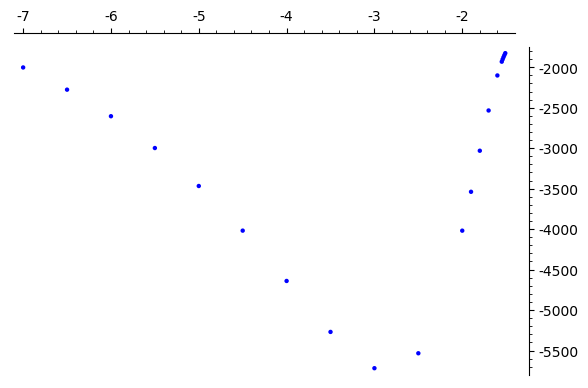

In [80]:
list_plot(plot_data_h_scalar).show()

Определяем функцию расчёта поперечной силы Лоренца (компонента $z$), действующей на торец другого цилиндра с координатой $Z_a$
удельная плотность силы Лоренца
$$f=\frac{1}{c}[j \times H]$$
поскольку в образовании результирующей силы участвуют только торцевые токи, берём поверхностный интеграл по площади поверхности торца
$$F=\frac{1}{c}\int\limits_{S_a}[j_t \times H]\,d{S_a}$$
в цилиндрической системе координат интеграл по площади торца
$$F=\frac{1}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{0}^{2\pi}[j_t \times H]\,r_a\,d{\varphi_a}\,d{r_a}$$
упрощая
$$F=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, H_{\varphi}\,r_a\,d{r_a}$$

где компонента $\varphi$ векторного магнитного поля $H_{\varphi} = \left(rot\,\vec{A}\right)_{\varphi}$

$H_{\varphi} = \frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

Раскладывая выражение для магнитного поля на слагаемые можно вычислить три компоненты силы Лоренца 

$$F_T =\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(\frac{\partial}{\partial z_a}A_T\right)\,r_a\,d{r_a}$$

$$F_S=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(- \frac{\partial}{\partial r_a}A_S\right)\,r_a\,d{r_a}$$

$$F_V=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(- \frac{\partial}{\partial r_a}A_V\right)\,r_a\,d{r_a}$$

Исходя из извесной формулы векторного анализа 

$$[\vec{j} \times rot\,\vec{A}] = \nabla\left(\vec{j}\cdot\vec{A}\right) - \left(\vec{j},\nabla\right)\vec{A}$$

легко понять что:

компонента силы Лоренца $F_T$ носит потенциальный характер

а компоненты силы Лоренца $F_S$ и $F_V$ носят конвективный характер

In [81]:
def calc_F_lorenz(Za, Ra1, Ra2):
    At_diff_za_subs_zj_za = lambda rj, ra : At_diff_za_subs_zj(rj, ra, Za)
    As_diff_ra_subs_rj_za = lambda ra, zj : As_diff_ra_subs_rj(ra, zj, Za)
    Av_diff_ra_subs_rj_za = lambda ra, zj : Av_diff_ra_subs_rj(ra, zj, Za)

    jt_c(r) = (jt(J, kappa, r)/c).substitute(J == J_d, kappa == kappa_d, c == c_d)

    At_diff_za_num_int_ra = lambda Rj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*At_diff_za_subs_zj_za(Rj, ra)), Ra1, Ra2)
    At_diff_za_num_int_ra_int_rj = num_int(lambda rj : At_diff_za_num_int_ra(rj), Rj1, Rj2)

    As_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*(As_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    As_diff_ra_num_int_ra_int_zj = num_int(lambda zj : As_diff_ra_num_int_ra(zj), Zj1, Zj2)

    Av_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*(Av_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    Av_diff_ra_num_int_ra_int_zj = num_int(lambda zj : Av_diff_ra_num_int_ra(zj), Zj1, Zj2)

    F_z_t = At_diff_za_num_int_ra_int_rj
    F_z_s = - As_diff_ra_num_int_ra_int_zj
    F_z_v = - Av_diff_ra_num_int_ra_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_t  =", F_z_t)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_s  =", F_z_s)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_v  =", F_z_v)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта поперечной Лоренца (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [82]:
def calc_F_lorenz_cylinder(dz):
    # расчет силы Лоренца, действующей на ближайжий (правый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - dz
    F_lorenz_left_cylinder_right_t = calc_F_lorenz(Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_right_t = ", F_lorenz_left_cylinder_right_t)

    # расчет силы Лоренца, действующей на удалённый (левый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - DZ - dz
    F_lorenz_left_cylinder_left_t = calc_F_lorenz(Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_left_t =", F_lorenz_left_cylinder_left_t)

    # учитывая отрицательное направление торцевого тока в правом торце и положительное направление торцевого тока в левом торце
    # находим суммарную силу Лоренца действующую на левый цилиндр
    F_lorenz_cylinder = - F_lorenz_left_cylinder_right_t[0] + F_lorenz_left_cylinder_left_t[0]
    print ("dz = ", dz, "F_lorenz_cylinder = ", F_lorenz_cylinder)

    F_lorenz_cylinder_potential = - F_lorenz_left_cylinder_right_t[1] + F_lorenz_left_cylinder_left_t[1]
    print ("dz = ", dz, "F_lorenz_cylinder_potential = ", F_lorenz_cylinder_potential)

    F_lorenz_cylinder_convective = - F_lorenz_left_cylinder_right_t[2] + F_lorenz_left_cylinder_left_t[2] \
                                   - F_lorenz_left_cylinder_right_t[3] + F_lorenz_left_cylinder_left_t[3]
    print ("dz = ", dz, "F_lorenz_cylinder_convective = ", F_lorenz_cylinder_convective)

    return (F_lorenz_cylinder, F_lorenz_cylinder_potential, F_lorenz_cylinder_convective)



Определяем функцию расчёта силы Николаева (компонента $z$), действующей на поверхность другого цилиндра с координатой $R_a$
удельная плотность силы Николаева
$$f=\frac{1}{c}\left(j \, H_{||}\right)$$

поскольку в образовании результирующей силы участвуют surface токи, берём поверхностный интеграл по площади поверхности surface
$$F=\frac{1}{c}\int\limits_{S_a}\left(j \, H_{||}\right)\,d{S_a}$$
в цилиндрической системе координат интеграл по площади surface
$$F=\frac{1}{c}\int\limits_{z_{a1}}^{z_{a2}}\int\limits_{0}^{2\pi}\left(j \, H_{||}\right)\,R_a\,d{\varphi_a}\,d{z_a}$$
упрощая
$$F=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, H_{||}\,d{z_a}$$

где скалярное магнитное поле $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

Раскладывая выражение для скалярного магнитного поля на слагаемые можно вычислить три компоненты силы Николаева

$$F_T=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right)\right)\,d{z_a}$$

$$F_S=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{\partial}{\partial z_a}A_S\right)\,d{z_a}$$

$$F_V=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{\partial}{\partial z_a}A_V\right)\,d{z_a}$$

Анализируя выражения для $F_S$ и $F_V$ можно заметить что они суть градиент потенциальной функции (50.8) взаимодействия токов согласно Тамм, Основы теории электричества, 1957, параграф 51 "Пондемоторное взаимодействие токов", с единственным отличием полученных здесь формул Николаева от формул Тамма - знак 

Таким образом компоненты силы Николаева $F_S$ и $F_V$ носят потенциальный характер. 

Анализируя выражения для $F_T$ можно заметить что по своему физическому смыслу она похожа на приложенную к рельсам продольную силу "отдачи рельсотрона" http://liquidcrystalosmos.narod.ru/railgun.htm существование которой отвергается в теории классической электродинамики 

Таким образом компонента силы Николаева $F_T$ носит конвективный характер и её существование под сомнением

In [83]:
def calc_F_nikolaev_int_on_surf(Ra, Za1, Za2):
    # integration on surface of the left cylinder
    At_ra_diff_ra_div_ra_subs_zj_ra = lambda rj, za : At_ra_diff_ra_div_ra_subs_zj(rj, Ra, za)
    As_diff_za_subs_rj_ra = lambda zj, za : As_diff_za_subs_rj(Ra, zj, za)
    Av_diff_za_subs_rj_ra = lambda zj, za : Av_diff_za_subs_rj(Ra, zj, za)
    
    js_c(r) = (js(J, kappa, r)/c).substitute(J == J_d, kappa == kappa_d, c == c_d)

    At_diff_ra_num_int_za = lambda Rj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*At_ra_diff_ra_div_ra_subs_zj_ra(Rj, za)), Za1, Za2)
    At_diff_ra_num_int_za_int_rj = num_int(lambda rj : At_diff_ra_num_int_za(rj), Rj1, Rj2)

    As_diff_za_num_int_za = lambda Zj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*(As_diff_za_subs_rj_ra(Zj, za) ) ), Za1, Za2)
    As_diff_za_num_int_za_int_zj = num_int(lambda zj : As_diff_za_num_int_za(zj), Zj1, Zj2)

    Av_diff_za_num_int_za = lambda Zj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*(Av_diff_za_subs_rj_ra(Zj, za) ) ), Za1, Za2)
    Av_diff_za_num_int_za_int_zj = num_int(lambda zj : Av_diff_za_num_int_za(zj), Zj1, Zj2)

    F_z_t = - At_diff_ra_num_int_za_int_rj
    F_z_s = - As_diff_za_num_int_za_int_zj
    F_z_v = - Av_diff_za_num_int_za_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_t  =", F_z_t)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_s  =", F_z_s)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_v  =", F_z_v)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта силы Николаева (компонента $z$), действующей на volume другого цилиндра
удельная плотность силы Николаева
$$f=\frac{1}{c}\left(j \, H_{||}\right)$$

в образовании результирующей силы участвуют volume токи, берём volume интеграл
$$F=\frac{1}{c}\int\limits_{V_a}\left(j_v \, H_{||}\right)\,d{V_a}$$
в цилиндрической системе координат интеграл по volume
$$F=\frac{1}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{z_{a1}}^{z_{a2}}\int\limits_{0}^{2\pi}\left(j_v \, H_{||}\right)\,r_a\,d{\varphi_a}\,d{z_a}\,d{r_a}$$
упрощая
$$F=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{z_{a1}}^{z_{a2}}\,j_v\, H_{||}\,r_a\,d{z_a}\,d{r_a}$$

где скалярное магнитное поле $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

In [84]:
def calc_F_nikolaev_int_on_volume(Ra1, Ra2, Za1, Za2):
    # integration on volume of the left cylinder

    jv_c(r) = (jv(r)/c).substitute(J == J_d, kappa == kappa_d, c == c_d)

    At_diff_ra_num_int_za = lambda rj, ra : num_int(lambda za : (2*pi*jv_c(ra)*ra*At_ra_diff_ra_div_ra_subs_zj(rj, ra, za)), Za1, Za2)
    At_diff_ra_num_int_za_int_ra = lambda rj : num_int(lambda ra : At_diff_ra_num_int_za(rj, ra), Ra1, Ra2)
    At_diff_ra_num_int_za_int_ra_int_rj = num_int(lambda rj : At_diff_ra_num_int_za_int_ra(rj), Rj1, Rj2)

    As_diff_za_num_int_za = lambda ra, zj : num_int(lambda za : (2*pi*jv_c(ra)*ra*(As_diff_za_subs_rj(ra, zj, za) ) ), Za1, Za2)
    As_diff_za_num_int_za_int_ra = lambda zj : num_int(lambda ra : As_diff_za_num_int_za(ra, zj), Ra1, Ra2)
    As_diff_za_num_int_za_int_ra_int_zj = num_int(lambda zj : As_diff_za_num_int_za_int_ra(zj), Zj1, Zj2)

    Av_diff_za_num_int_za = lambda ra, zj : num_int(lambda za : (2*pi*jv_c(ra)*ra*(Av_diff_za_subs_rj(ra, zj, za) ) ), Za1, Za2)
    Av_diff_za_num_int_za_int_ra = lambda zj : num_int(lambda ra : Av_diff_za_num_int_za(ra, zj), Ra1, Ra2)
    Av_diff_za_num_int_za_int_ra_int_zj = num_int(lambda zj : Av_diff_za_num_int_za_int_ra(zj), Zj1, Zj2)

    F_z_t = - At_diff_ra_num_int_za_int_ra_int_rj
    F_z_s = - As_diff_za_num_int_za_int_ra_int_zj
    F_z_v = - Av_diff_za_num_int_za_int_ra_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_t  =", F_z_t)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_s  =", F_z_s)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_v  =", F_z_v)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта силы Николаева (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [85]:
def calc_F_nikolaev_cylinder(dz):
    # расчет силы Николаева, действующей на inner surface пробного цилиндра расположенного левее на расстоянии
    Za1 = Zj1 - dz - DZ
    Za2 = Zj1 - dz
    Ra = Rj1
    F_nikolaev_left_cylinder_inner_surf = calc_F_nikolaev_int_on_surf(Ra, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_inner_surf = ", F_nikolaev_left_cylinder_inner_surf)

    # расчет силы Николаева, действующей на outer surface пробного цилиндра расположенного левее на расстоянии
    Ra =  Rj2
    F_nikolaev_left_cylinder_outer_surf = calc_F_nikolaev_int_on_surf(Ra, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_outer_surf =", F_nikolaev_left_cylinder_outer_surf)

    # расчет силы Николаева, действующей на volume пробного цилиндра расположенного левее на расстоянии
    Ra1 = Rj1
    Ra2 = Rj2
    F_nikolaev_left_cylinder_volume = calc_F_nikolaev_int_on_volume(Ra1, Ra2, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_volume =", F_nikolaev_left_cylinder_volume)
    
    # учитывая что отрицательное направление объемного тока уже учтено в jv(r) = - c * I0 / r
    # учитывая отрицательное направление поверхностного тока на внутренней поверхности (inner surface)
    # и положительное направление поверхностного тока на внешней поверхности (outer surface)
    # находим суммарную силу Николаева действующую на левый цилиндр
    F_nikolaev_cylinder = F_nikolaev_left_cylinder_volume[0] - F_nikolaev_left_cylinder_inner_surf[0] + F_nikolaev_left_cylinder_outer_surf[0]
    print ("dz = ", dz, "F_nikolaev_cylinder = ", F_nikolaev_cylinder)

    F_nikolaev_cylinder_convective = F_nikolaev_left_cylinder_volume[1] - F_nikolaev_left_cylinder_inner_surf[1] + F_nikolaev_left_cylinder_outer_surf[1]
    print ("dz = ", dz, "F_nikolaev_cylinder_convective = ", F_nikolaev_cylinder_convective)
    
    F_nikolaev_cylinder_potential = F_nikolaev_left_cylinder_volume[2] - F_nikolaev_left_cylinder_inner_surf[2] + F_nikolaev_left_cylinder_outer_surf[2] \
                                  + F_nikolaev_left_cylinder_volume[3] - F_nikolaev_left_cylinder_inner_surf[3] + F_nikolaev_left_cylinder_outer_surf[3]
    print ("dz = ", dz, "F_nikolaev_cylinder_potential = ", F_nikolaev_cylinder_potential)


    return (F_nikolaev_cylinder, F_nikolaev_cylinder_convective, F_nikolaev_cylinder_potential)



Запуск расчёта силы Лоренца и величины векторного магнитного поля для заданного набора значений зазора между цилиндрами

In [86]:
plot_data_f_lorenz = []
plot_data_f_lorenz_potential_t = []
plot_data_f_lorenz_convective_sv = []
plot_data_f_nikolaev = []
plot_data_f_nikolaev_convective_t = []
plot_data_f_nikolaev_potential_sv = []
plot_data_f_sum = []
#plot_data_f_sum = []
#plot_data_f_sum = []

plot_data_h = []
plot_data_h_t = []
plot_data_h_sv = []

plot_data_s = []
plot_data_s_t = []
plot_data_s_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    h = calc_H_phi(Za, Ra)
    s = calc_H_scalar(Za, Ra)
    f_nikolaev = calc_F_nikolaev_cylinder(dz)
    f_lorenz = calc_F_lorenz_cylinder(dz)

    plot_data_h += [(Za, h[0])]
    plot_data_h_t += [(Za, h[1])]
    plot_data_h_sv += [(Za, h[2])]

    plot_data_s += [(Za, s[0])]
    plot_data_s_t += [(Za, s[1])]
    plot_data_s_sv += [(Za, s[2])]

    plot_data_f_lorenz += [(Za, f_lorenz[0])]
    plot_data_f_lorenz_potential_t += [(Za, f_lorenz[1])]
    plot_data_f_lorenz_convective_sv += [(Za, f_lorenz[2])]

    plot_data_f_nikolaev += [(Za, f_nikolaev[0])]
    plot_data_f_nikolaev_convective_t += [(Za, f_nikolaev[1])]
    plot_data_f_nikolaev_potential_sv += [(Za, f_nikolaev[2])]

    plot_data_f_sum += [(Za, f_lorenz + f_nikolaev)]
    #plot_data_f_sum += [(Za, f_lorenz + f_nikolaev)]
    #plot_data_f_sum += [(Za, f_lorenz + f_nikolaev)]


Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_t = 27469.95974880026
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_sv = -29833.15605713167
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi = -2363.1963083314113
Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar_t = -12115.8550739229
Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar_sv = 10290.14212386148
Ra = 0.900000000000000 Za = -1.51000000000000 H_scalar = -1825.7129500614192
Za1 = -4.51000000000000 Za2 = -1.51000000000000 Ra = 0.300000000000000 F_z_t  = -4014435572.6711426
Za1 = -4.51000000000000 Za2 = -1.51000000000000 Ra = 0.300000000000000 F_z_s  = 1101297604.5045304
Za1 = -4.51000000000000 Za2 = -1.51000000000000 Ra = 0.300000000000000 F_z_v  = -0.0
Za1 = -4.51000000000000 Za2 = -1.51000000000000 Ra = 0.300000000000000 F_z    = -2913137968.166612
Ra =  0.300000000000000 F_nikolaev_left_cylinder_inner_surf =  (-2913137968.166612, -4014435572.6711426, 1101297604.5045304, -0.0)
Za1 = -4.51000000000000 Za2 = 

Za1 = -4.53000000000000 Za2 = -1.53000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_t  = -0.0
Za1 = -4.53000000000000 Za2 = -1.53000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_s  = -0.0
Za1 = -4.53000000000000 Za2 = -1.53000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_v  = -0.0
Za1 = -4.53000000000000 Za2 = -1.53000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z    = -0.0
Ra =  1.50000000000000 F_nikolaev_left_cylinder_volume = (-0.0, -0.0, -0.0, -0.0)
dz =  0.0300000000000000 F_nikolaev_cylinder =  2842885356.344351
dz =  0.0300000000000000 F_nikolaev_cylinder_convective =  3910760371.628073
dz =  0.0300000000000000 F_nikolaev_cylinder_potential =  -1067875015.2837222
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.53000000000000 F_z_t  = 1021511262.4900361
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.53000000000000 F_z_s  = -1076505450.9678526
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.530000000

Ra = 0.900000000000000 Za = -1.60000000000000 H_phi_t = 25436.95982724023
Ra = 0.900000000000000 Za = -1.60000000000000 H_phi_sv = -26017.79071086971
Ra = 0.900000000000000 Za = -1.60000000000000 H_phi = -580.8308836294818
Ra = 0.900000000000000 Za = -1.60000000000000 H_scalar_t = -12308.18807938429
Ra = 0.900000000000000 Za = -1.60000000000000 H_scalar_sv = 10206.89186916712
Ra = 0.900000000000000 Za = -1.60000000000000 H_scalar = -2101.2962102171696
Za1 = -4.60000000000000 Za2 = -1.60000000000000 Ra = 0.300000000000000 F_z_t  = -3671385223.1507864
Za1 = -4.60000000000000 Za2 = -1.60000000000000 Ra = 0.300000000000000 F_z_s  = 867924457.7896057
Za1 = -4.60000000000000 Za2 = -1.60000000000000 Ra = 0.300000000000000 F_z_v  = -0.0
Za1 = -4.60000000000000 Za2 = -1.60000000000000 Ra = 0.300000000000000 F_z    = -2803460765.361181
Ra =  0.300000000000000 F_nikolaev_left_cylinder_inner_surf =  (-2803460765.361181, -3671385223.1507864, 867924457.7896057, -0.0)
Za1 = -4.60000000000000 Za2 = -1

Za1 = -4.80000000000000 Za2 = -1.80000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_t  = -0.0
Za1 = -4.80000000000000 Za2 = -1.80000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_s  = -0.0
Za1 = -4.80000000000000 Za2 = -1.80000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_v  = -0.0
Za1 = -4.80000000000000 Za2 = -1.80000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z    = -0.0
Ra =  1.50000000000000 F_nikolaev_left_cylinder_volume = (-0.0, -0.0, -0.0, -0.0)
dz =  0.300000000000000 F_nikolaev_cylinder =  2489424932.821859
dz =  0.300000000000000 F_nikolaev_cylinder_convective =  3036832808.6705065
dz =  0.300000000000000 F_nikolaev_cylinder_potential =  -547407875.8486478
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.80000000000000 F_z_t  = 665848201.1163032
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.80000000000000 F_z_s  = -553883834.298593
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.80000000000000 

Ra = 0.900000000000000 Za = -2.50000000000000 H_phi_t = 9740.899478261645
Ra = 0.900000000000000 Za = -2.50000000000000 H_phi_sv = -4970.616750160745
Ra = 0.900000000000000 Za = -2.50000000000000 H_phi = 4770.2827281008995
Ra = 0.900000000000000 Za = -2.50000000000000 H_scalar_t = -10255.6552076763
Ra = 0.900000000000000 Za = -2.50000000000000 H_scalar_sv = 4721.610499220335
Ra = 0.900000000000000 Za = -2.50000000000000 H_scalar = -5534.044708455965
Za1 = -5.50000000000000 Za2 = -2.50000000000000 Ra = 0.300000000000000 F_z_t  = -2001170758.4853349
Za1 = -5.50000000000000 Za2 = -2.50000000000000 Ra = 0.300000000000000 F_z_s  = 187408575.01851365
Za1 = -5.50000000000000 Za2 = -2.50000000000000 Ra = 0.300000000000000 F_z_v  = -0.0
Za1 = -5.50000000000000 Za2 = -2.50000000000000 Ra = 0.300000000000000 F_z    = -1813762183.4668212
Ra =  0.300000000000000 F_nikolaev_left_cylinder_inner_surf =  (-1813762183.4668212, -2001170758.4853349, 187408575.01851365, -0.0)
Za1 = -5.50000000000000 Za2 = 

Za1 = -6.50000000000000 Za2 = -3.50000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_t  = -0.0
Za1 = -6.50000000000000 Za2 = -3.50000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_s  = -0.0
Za1 = -6.50000000000000 Za2 = -3.50000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z_v  = -0.0
Za1 = -6.50000000000000 Za2 = -3.50000000000000 Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 F_z    = -0.0
Ra =  1.50000000000000 F_nikolaev_left_cylinder_volume = (-0.0, -0.0, -0.0, -0.0)
dz =  2.00000000000000 F_nikolaev_cylinder =  1038945743.3134884
dz =  2.00000000000000 F_nikolaev_cylinder_convective =  1067884499.3419257
dz =  2.00000000000000 F_nikolaev_cylinder_potential =  -28938756.028437395
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.50000000000000 F_z_t  = 132813675.89391783
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.50000000000000 F_z_s  = -30357664.745698445
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.5000000000000

In [87]:
Ra = (Rj1 + Rj2) / 2
Za = 0
h = calc_H_phi(Za, Ra)

Ra = 0.900000000000000 Za = 0 H_phi_t = -15200.54085383653
Ra = 0.900000000000000 Za = 0 H_phi_sv = -56718.68553080542
Ra = 0.900000000000000 Za = 0 H_phi = -71919.22638464195


In [88]:
dr = 0.01
dz = 0.04
Za = 0
for Ra in(Rj1 - dr, Rj1 + dr, (Rj1 + Rj2)/2, Rj2 - dr, Rj2 + dr, 2 * Rj2, 10 * Rj2):
    h = calc_H_phi( Za, Ra)

Ra = 0.290000000000000 Za = 0 H_phi_t = -18350.1365828206
Ra = 0.290000000000000 Za = 0 H_phi_sv = 2006.46683922099
Ra = 0.290000000000000 Za = 0 H_phi = -16343.66974359961
Ra = 0.310000000000000 Za = 0 H_phi_t = -18293.70708395152
Ra = 0.310000000000000 Za = 0 H_phi_sv = -175409.7538098028
Ra = 0.310000000000000 Za = 0 H_phi = -193703.46089375432
Ra = 0.900000000000000 Za = 0 H_phi_t = -15200.54085383653
Ra = 0.900000000000000 Za = 0 H_phi_sv = -56718.68553080542
Ra = 0.900000000000000 Za = 0 H_phi = -71919.22638464195
Ra = 1.49000000000000 Za = 0 H_phi_t = -10612.24689720777
Ra = 1.49000000000000 Za = 0 H_phi_sv = -32920.10012325177
Ra = 1.49000000000000 Za = 0 H_phi = -43532.347020459536
Ra = 1.51000000000000 Za = 0 H_phi_t = -10456.70860326889
Ra = 1.51000000000000 Za = 0 H_phi_sv = 3974.968850134766
Ra = 1.51000000000000 Za = 0 H_phi = -6481.739753134123
Ra = 3.00000000000000 Za = 0 H_phi_t = -2969.825933017188
Ra = 3.00000000000000 Za = 0 H_phi_sv = 1043.840541379731
Ra = 3.00000

Результирующий график силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра в сантиметрах. Сила в динах (ибо все расчеты здесь произведены в системе гаусса).

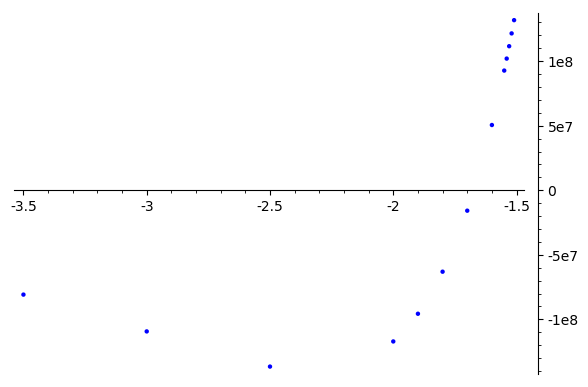

In [89]:
list_plot(plot_data_f_lorenz).show()

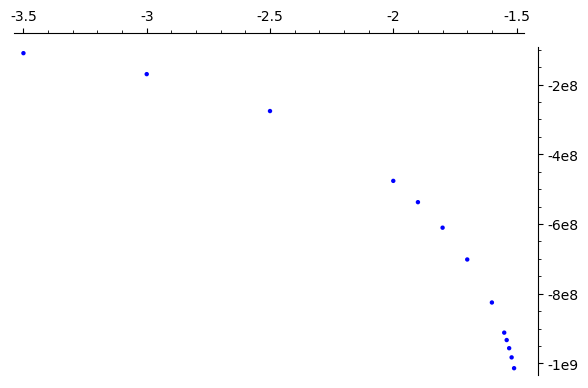

In [90]:
list_plot(plot_data_f_lorenz_potential_t).show()

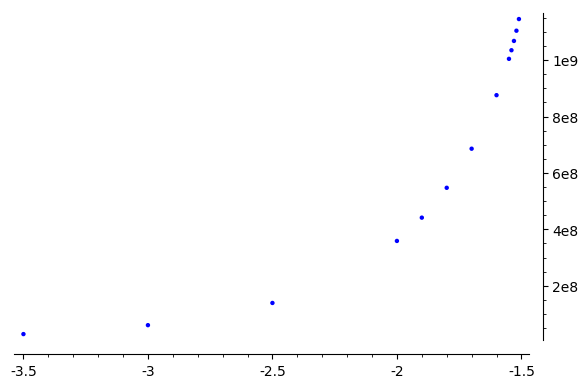

In [91]:
list_plot(plot_data_f_lorenz_convective_sv).show()

Результирующий график силы Николаева приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

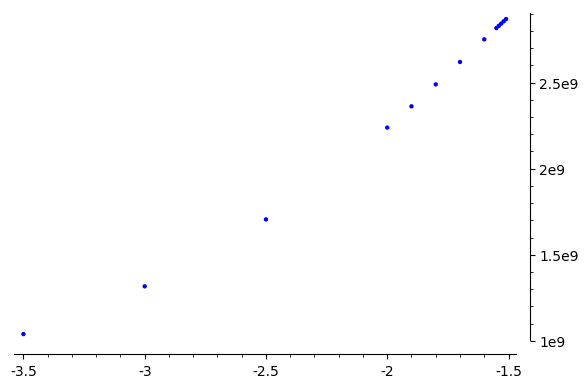

In [92]:
list_plot(plot_data_f_nikolaev).show()

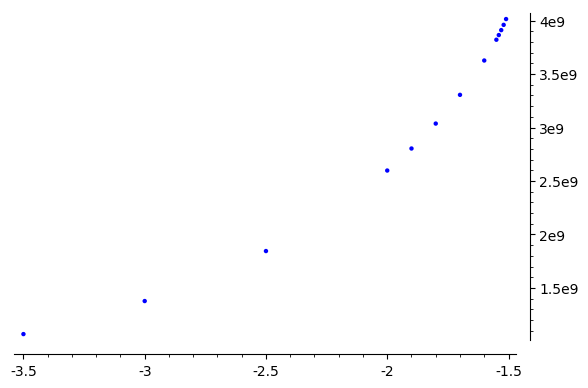

In [93]:
list_plot(plot_data_f_nikolaev_convective_t).show()

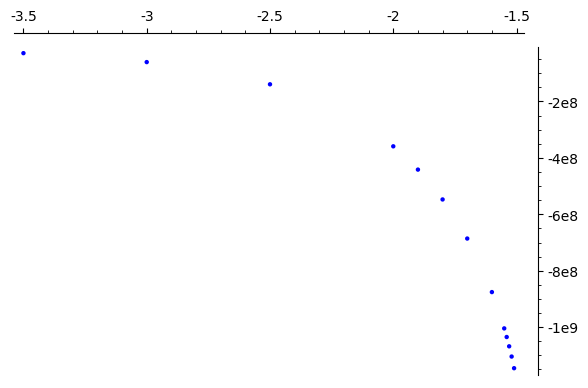

In [94]:
list_plot(plot_data_f_nikolaev_potential_sv).show()

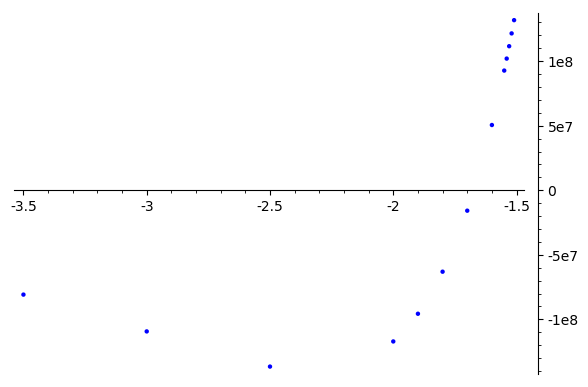

In [95]:
plot_data_f_lorenz_nikolaev_potential = []
for i in range(len(plot_data_f_lorenz_potential_t)):
    (Za, f_lorenz_potential_t) = plot_data_f_lorenz_potential_t[i]
    (Za, f_nikolaev_potential_sv) = plot_data_f_nikolaev_potential_sv[i]
    plot_data_f_lorenz_nikolaev_potential += [(Za, f_lorenz_potential_t - f_nikolaev_potential_sv)]
list_plot(plot_data_f_lorenz_nikolaev_potential).show()

Результирующий график силы Николаева + силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

In [96]:
#list_plot(plot_data_f_sum).show()

Результаты расчёта силы притяжения между тороидально намагниченными цилиндрами в зависимости от зазора позволяют сделать вывод о том, что поперечная сила Ампера-Лоренца при величине зазора меньше определённого предела работает на притяжение цилиндров, которое собственно и зафиксировано в опыте. 

численные значения силы Ампера-Лоренца:

$dz\,=\,0.1\,мм\,F_{lorenz}\,=\,131798157\,дин\,=\,13.18\,Ньютон$ 

$dz\,=\,0.2\,мм\,F_{lorenz}\,=\,121534907\,дин\,=\,12.15\,Ньютон$

$dz\,=\,1.0\,мм\,F_{lorenz}\,=\,\,\,50568342\,дин\,=\,\,5.05\,Ньютон$

$dz\,=\,2.0\,мм\,F_{lorenz}\,=-15795654\,дин\,=-1.58\,Ньютон$


При сравнении полученных значений с экспериментом весьма существенно понимать, что численное значение вычисленной силы квадратично зависит от величины магнитной восприимчивости.

Более того последняя зависит также от величины напряженности магнитного поля прямого провода с током (Кривая Столетова). Данное обстоятельство, вообще говоря, приведёт к зависимости намагниченности от радиуса иного вида, чем в рассматриваемой здесь модели (обратная пропорциональность намагниченности от радиуса).

При величине зазора больше определённого предела (2-3 мм) поперечная сила Ампера-Лоренца работает на отталкивание цилиндров. Этот предел расстояния на котором происходит изменение знака силы Лоренца зависит от вида зависимости намагниченности от радиуса.

Изменение знака силы взаимодействия цилиндров в опыте Дейны зафиксировано не было, ввиду того, что при планировании эксперимента вопрос о зависимости направления силы взаимодействия от зазора между цилиндрами не ставился. Кроме того в предоставленном С.А.Дейной видео отсутствуют доказательства того, что знак направления силы взаимодействия цилиндров не зависит от расстояния, и потому не следует считать доказанным существование силы Николаева на основании данного видео материала.

На взгляд автора для дальнейших исследований необходима следующая постановка эксперимента: установить зазор между цилиндрами более 3 мм. И показать направление силы их взаимодействия: притягивание или отталкивание.

Таким образом в данной работе показано, что для доказательства существования продольной силы Николаева с помощью опыта Дейны (опыт Николаева 31) совершенно недостаточно установления факта притяжения цилиндров при зазоре между их торцами менее 3 мм. Для выяснения этого вопроса необходимы дальнейшие экспериментальные и теоретические исследования.

В частности необходимо исследование вида зависимости намагниченности от радиуса.

# К вопросу о теореме циркуляции магнитного поля в плоскости вне материала тороидально намагниченного цилиндра

Результирующий график векторного магнитного поля $H$ (компонента $\varphi$) на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

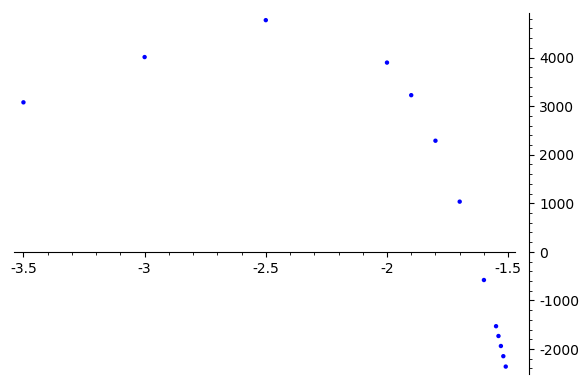

In [97]:
list_plot(plot_data_h).show()

Может показаться, что полученные в данной работе результаты о налиции угловой компоненты векторного магнитного поля за пределами материала тороидально намагниченного цилиндра противоречат теореме о циркуляции магнитного поля.

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

Действительно, циркуляция магнитного поля взятая по окружности отстоящей на некотором расстоянии от торца тороидально намагниченного цилиндра отлична от нуля, в то время как молекулярные токи намагниченности не пересекают плоскость, натянутую на эту окружность.

Это кажущееся противоречие разрешается тем, что данную плоскость пересекают токи смещения продуцированные молекулярными токами намагниченности цилиндра.

Исходя из определения ротора в цилиндрических координатах и того факта что в данной конфигурации отлична от нуля только $H_{\varphi}$ компонента магнитного поля для ротора $H$ будут отличными от нуля следующие две компоненты


$rot\,H_r = -\frac{\partial}{\partial z_a}H_{\varphi}$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,H_{\varphi})$

где

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

Итак,

$rot\,H_r = -\frac{\partial}{\partial z_a}\frac{\partial}{\partial z_a}A_T+\frac{\partial}{\partial z_a}\frac{\partial}{\partial r_a}(A_S+A_V)$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial z_a}A_T)-\frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial r_a}(A_S+A_V))$

In [98]:
At2_diff_za_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj1, zj2, za : (1/ra)*(ra*At2_diff_za (J, c, kappa, rj, ra, zj1, zj2, za)).diff(ra)
print(At2_diff_za_mult_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj1, zj2, za))

4*((6*J*kappa*(ra - rj)*(za - zj1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/(((ra - rj)^2 + (za - zj1)^2)^(5/2)*c) - 6*J*kappa*(ra - rj)*(za - zj2)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/(((ra - rj)^2 + (za - zj2)^2)^(5/2)*c) - (8*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj1)^2)^2 - rj/((ra - rj)^2 + (za - zj1)^2))*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - ((ra - rj)^2 + (za - zj1)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj1)^2)^2 - rj/((ra - rj)^2 + (za - zj1)^2))/(ra*rj) - ((ra - rj)^2 + (za - zj1)^2)*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj1)^2)^2 - rj/((ra - rj)^2 + (za - zj1)^2))*(elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))/(ra*rj))*J*kappa*(za - zj1)/(((ra - rj)^2 + (za - zj1)^2)^(3/2)*c*(4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)) - 6*((

In [99]:
As2_diff_ra_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za : (1/ra)*(ra*As2_diff_ra (J, c, kappa, rj1, rj2, ra, zj, za)).diff(ra)
print (As2_diff_ra_mult_ra_diff_ra_div_ra (J, c, kappa, rj1, rj2, ra, zj, za))

-2*((12*J*kappa*(ra - rj1)^2*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/(((ra - rj1)^2 + (za - zj)^2)^(5/2)*c) - 12*J*kappa*(ra - rj2)^2*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/(((ra - rj2)^2 + (za - zj)^2)^(5/2)*c) - sqrt((ra - rj1)^2 + (za - zj)^2)*(8*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - ((ra - rj1)^2 + (za - zj)^2)*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))/(ra*rj1) - ((ra - rj1)^2 + (za - zj)^2)*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))*(elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))/(ra*rj1))*J*kappa*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((

In [100]:
exec(preparse("At_diff_za_mult_ra_diff_ra_div_ra_subs_zj = lambda rj, ra, za : " + str(At2_diff_za_mult_ra_diff_ra_div_ra (J_d, c_d, kappa_d, rj, ra, Zj1, Zj2, za))))
# print (At_diff_za_mult_ra_diff_ra_div_ra_subs_zj (rj, ra, za))

In [101]:
exec(preparse("As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : " + str(As2_diff_ra_mult_ra_diff_ra_div_ra (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za))))
# print (As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj (ra, zj, za))

In [102]:
exec(preparse("Av_diff_ra_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj, ra, zj, za : " + str((1/ra)*(ra*Av_diff_ra(J, c, kappa, rj, ra, zj, za)).diff(ra))))
print (Av_diff_ra_mult_ra_diff_ra_div_ra (J, c, kappa, rj, ra, zj, za))

0


In [103]:
AV_diff_ra_mult_ra_diff_ra_div_ra = lambda J, c, kappa, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra_mult_ra_diff_ra_div_ra(J, c, kappa, rj, ra, zj, za), rj1, rj2)

In [104]:
Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : AV_diff_ra_mult_ra_diff_ra_div_ra (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)
# print (Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(ra, zj, za))

In [105]:
def calc_rot_H_z(Za, Ra):
    At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra = lambda rj : At_diff_za_mult_ra_diff_ra_div_ra_subs_zj(rj, Ra, Za)
    As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra = lambda zj : As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za)

    At_diff_za_mult_ra_diff_ra_div_ra_num_int = At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_mult_ra_diff_ra_div_ra_num_int = num_int( lambda zj : Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_num_int[0] + Av_diff_ra_mult_ra_diff_ra_div_ra_num_int

    rot_H_z = At_diff_za_mult_ra_diff_ra_div_ra_num_int[0] - As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int

    print ("Ra =", Ra, "Za =", Za, "rot_H_z =", rot_H_z)

    return rot_H_z

Теорема о циркуляции магнитного поля записывается следующим образом

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

Вне материала цилиндра ток проводимости (равно как и молекулярный ток намагниченности) равен нулю.

Поэтому единственно возможный вариант в этом случае принять, что циркуляция магнитного поля в плоскости не пересекающей материал тороидально намагниченного цилиндра, обусловлена токами смещения

$\vec{j_{см}} = \frac{c}{4\pi}\,  rot\,\vec{H}$

Подставляя данное выражение для тока смещения в теорему о циркуляции приходим к тождеству

$\oint {\vec  B}\cdot {\vec  {dl}}=  \int { rot\,\vec{H}}\cdot {\vec  {ds}}$

проверкой которого и займёмся

$2\,\pi\,R_a\ H_{\varphi} =  \int\limits_{0}^{2\pi}\int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}\,{d\varphi}$

$2\,\pi\,R_a\ H_{\varphi} = 2\,\pi\, \int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}$


In [106]:
dr = 0.01
dz = 0.04
Za = Zj1 - dz
circ_H_J_z = []
for Ra in(Rj1 - dr, Rj1 + dr, (Rj1 + Rj2)/2, Rj2 - dr, Rj2 + dr, 2 * Rj2, 10 * Rj2):
    (H_phi, H_phi_t, H_phi_s) = calc_H_phi(Za, Ra)
    circ_H = 2 * pi * Ra * H_phi
    print ("circ_H (", Ra, ") = ", circ_H)

    J_z = 2 * pi * num_int( lambda ra : ra * calc_rot_H_z(Za, ra), 0, Ra)
    print ("J_z (", Ra, ") = ", J_z)
    
    circ_H_J_z += [((Ra, Za), (circ_H, J_z))]

Ra = 0.290000000000000 Za = -1.54000000000000 H_phi_t = 32052.75042068101
Ra = 0.290000000000000 Za = -1.54000000000000 H_phi_sv = -31665.54799991523
Ra = 0.290000000000000 Za = -1.54000000000000 H_phi = 387.2024207657814
circ_H ( 0.290000000000000 ) =  224.577404044153*pi
Ra = 0.145 Za = -1.54000000000000 rot_H_z = -524.4648737651733
Ra = 0.0037835533650101005 Za = -1.54000000000000 rot_H_z = 668959.9703603229
Ra = 0.2862164466349899 Za = -1.54000000000000 rot_H_z = -69.92532056826167
Ra = 0.01956581183009723 Za = -1.54000000000000 rot_H_z = 102025.52374953618
Ra = 0.2704341881699027 Za = -1.54000000000000 rot_H_z = -56.81833643477876
Ra = 0.046485612596641454 Za = -1.54000000000000 rot_H_z = 27407.42010236092
Ra = 0.2435143874033585 Za = -1.54000000000000 rot_H_z = -602.7707923781709
Ra = 0.08215766785125915 Za = -1.54000000000000 rot_H_z = 7234.8396266872005
Ra = 0.20784233214874082 Za = -1.54000000000000 rot_H_z = -1211.2446535065828
Ra = 0.12341322084766346 Za = -1.54000000000000 

Ra = 0.13801337381044732 Za = -1.54000000000000 rot_H_z = -202.6887800283148
Ra = 0.033886322063183136 Za = -1.54000000000000 rot_H_z = 46791.81247517146
Ra = 0.12111367793681686 Za = -1.54000000000000 rot_H_z = 938.4475834602854
Ra = 0.05468455314063683 Za = -1.54000000000000 rot_H_z = 19991.76714877114
Ra = 0.10031544685936317 Za = -1.54000000000000 rot_H_z = 3401.833227601339
Ra = 0.23249999999999998 Za = -1.54000000000000 rot_H_z = -835.7519568940043
Ra = 0.15702224403991916 Za = -1.54000000000000 rot_H_z = -923.8714679026743
Ra = 0.3079777559600808 Za = -1.54000000000000 rot_H_z = -1195.7165487706661
Ra = 0.16545758908160368 Za = -1.54000000000000 rot_H_z = -1108.4229691820074
Ra = 0.2995424109183963 Za = -1.54000000000000 rot_H_z = -588.9634041966638
Ra = 0.1798457584568256 Za = -1.54000000000000 rot_H_z = -1278.174393438443
Ra = 0.28515424154317437 Za = -1.54000000000000 rot_H_z = -51.74294061877299
Ra = 0.1989118569549833 Za = -1.54000000000000 rot_H_z = -1280.6289451847988
Ra 

Ra = 0.4342854355550344 Za = -1.54000000000000 rot_H_z = -6984.556006834369
Ra = 0.0493160115180562 Za = -1.54000000000000 rot_H_z = 24531.272685931435
Ra = 0.4006839884819438 Za = -1.54000000000000 rot_H_z = -6749.982244161089
Ra = 0.09837964469956395 Za = -1.54000000000000 rot_H_z = 3717.132508852301
Ra = 0.35162035530043606 Za = -1.54000000000000 rot_H_z = -4953.014576159505
Ra = 0.15876160589217148 Za = -1.54000000000000 rot_H_z = -967.7840016460977
Ra = 0.29123839410782854 Za = -1.54000000000000 rot_H_z = -200.08383303682785
Ra = 0.675 Za = -1.54000000000000 rot_H_z = -4602.748940743666
Ra = 0.45587103108363636 Za = -1.54000000000000 rot_H_z = -6930.3871513800805
Ra = 0.8941289689163637 Za = -1.54000000000000 rot_H_z = -2858.5401693383483
Ra = 0.4803607424949785 Za = -1.54000000000000 rot_H_z = -6760.93675087918
Ra = 0.8696392575050216 Za = -1.54000000000000 rot_H_z = -3011.2110551807195
Ra = 0.5221328471327196 Za = -1.54000000000000 rot_H_z = -6335.573290495799
Ra = 0.82786715286

Ra = 0.362094911174891 Za = -1.54000000000000 rot_H_z = -5555.010823109391
Ra = 0.4254050888251091 Za = -1.54000000000000 rot_H_z = -6968.565390761083
Ra = 0.3771904014730429 Za = -1.54000000000000 rot_H_z = -6188.080668669776
Ra = 0.4103095985269572 Za = -1.54000000000000 rot_H_z = -6870.87042116368
Ra = 0.253125 Za = -1.54000000000000 rot_H_z = -385.97861679876223
Ra = 0.22573387888545454 Za = -1.54000000000000 rot_H_z = -962.1012874298904
Ra = 0.28051612111454544 Za = -1.54000000000000 rot_H_z = -6.293391261482611
Ra = 0.2287950928118723 Za = -1.54000000000000 rot_H_z = -906.8205911518016
Ra = 0.27745490718812765 Za = -1.54000000000000 rot_H_z = -2.9534404615405947
Ra = 0.23401660589158993 Za = -1.54000000000000 rot_H_z = -805.4490130651975
Ra = 0.2722333941084101 Za = -1.54000000000000 rot_H_z = -36.181162677297834
Ra = 0.2409357545401149 Za = -1.54000000000000 rot_H_z = -659.6421690548013
Ra = 0.2653142454598851 Za = -1.54000000000000 rot_H_z = -134.69608122849604
Ra = 0.248937909

Ra = 1.4083546031534402 Za = -1.54000000000000 rot_H_z = -1029.6039314581903
Ra = 0.9078729673359447 Za = -1.54000000000000 rot_H_z = -2776.6766688966372
Ra = 1.3271270326640552 Za = -1.54000000000000 rot_H_z = -1193.3456094208295
Ra = 1.007838658643706 Za = -1.54000000000000 rot_H_z = -2254.262701881951
Ra = 1.2271613413562938 Za = -1.54000000000000 rot_H_z = -1448.3623639386215
Ra = 0.18625 Za = -1.54000000000000 rot_H_z = -1304.259282526691
Ra = 0.004859909063676754 Za = -1.54000000000000 rot_H_z = 512661.6582980777
Ra = 0.3676400909363232 Za = -1.54000000000000 rot_H_z = -5817.339894420002
Ra = 0.025131947954176642 Za = -1.54000000000000 rot_H_z = 72771.06353559543
Ra = 0.34736805204582333 Za = -1.54000000000000 rot_H_z = -4666.103887777426
Ra = 0.05970996790430669 Za = -1.54000000000000 rot_H_z = 16583.741229589934
Ra = 0.31279003209569334 Za = -1.54000000000000 rot_H_z = -1613.9479544174392
Ra = 0.1055301078434277 Za = -1.54000000000000 rot_H_z = 2637.073785589375
Ra = 0.26696989

Ra = 0.06570966466092652 Za = -1.54000000000000 rot_H_z = 13308.337920205464
Ra = 0.12054033533907348 Za = -1.54000000000000 rot_H_z = 988.2004774522793
Ra = 0.279375 Za = -1.54000000000000 rot_H_z = -2.797579135396518
Ra = 0.18867995453183836 Za = -1.54000000000000 rot_H_z = -1307.1349976986967
Ra = 0.3700700454681616 Za = -1.54000000000000 rot_H_z = -5920.986002977006
Ra = 0.1988159739770883 Za = -1.54000000000000 rot_H_z = -1281.1505137850036
Ra = 0.3599340260229117 Za = -1.54000000000000 rot_H_z = -5442.577709056612
Ra = 0.21610498395215333 Za = -1.54000000000000 rot_H_z = -1113.0167980224069
Ra = 0.34264501604784664 Za = -1.54000000000000 rot_H_z = -4317.827483216068
Ra = 0.23901505392171385 Za = -1.54000000000000 rot_H_z = -701.2215393956867
Ra = 0.3197349460782861 Za = -1.54000000000000 rot_H_z = -2266.9496983489953
Ra = 0.2655110771823356 Za = -1.54000000000000 rot_H_z = -131.26766702602617
Ra = 0.2932389228176644 Za = -1.54000000000000 rot_H_z = -273.5458285904024
Ra = 0.18665

Ra = 0.5899408183373982 Za = -1.54000000000000 rot_H_z = -5539.081535646408
Ra = 0.26636669433019877 Za = -1.54000000000000 rot_H_z = -116.72117008757778
Ra = 0.48863330566980123 Za = -1.54000000000000 rot_H_z = -6686.736293302711
Ra = 1.1325 Za = -1.54000000000000 rot_H_z = -1749.00204103031
Ra = 0.7648502854847677 Za = -1.54000000000000 rot_H_z = -3776.3101374506105
Ra = 1.5001497145152323 Za = -1.54000000000000 rot_H_z = -882.195417726005
Ra = 0.8059385790749084 Za = -1.54000000000000 rot_H_z = -3453.055145628698
Ra = 1.4590614209250918 Za = -1.54000000000000 rot_H_z = -948.5528999129892
Ra = 0.8760228879671184 Za = -1.54000000000000 rot_H_z = -2970.550909579391
Ra = 1.3889771120328818 Za = -1.54000000000000 rot_H_z = -1064.9944519826713
Ra = 0.9688932387162092 Za = -1.54000000000000 rot_H_z = -2443.5353167193643
Ra = 1.2961067612837909 Za = -1.54000000000000 rot_H_z = -1266.1419983568248
Ra = 1.0762999370344344 Za = -1.54000000000000 rot_H_z = -1959.5091228675492
Ra = 1.18870006296

Ra = 0.002462571371191921 Za = -1.54000000000000 rot_H_z = 1047788.6041945383
Ra = 0.1862874286288081 Za = -1.54000000000000 rot_H_z = -1304.3319167885056
Ra = 0.012734644768727085 Za = -1.54000000000000 rot_H_z = 174028.62138958648
Ra = 0.17601535523127293 Za = -1.54000000000000 rot_H_z = -1248.8709235753631
Ra = 0.030255721991779574 Za = -1.54000000000000 rot_H_z = 55647.69126620063
Ra = 0.1584942780082204 Za = -1.54000000000000 rot_H_z = -961.242132354877
Ra = 0.0534733096790523 Za = -1.54000000000000 rot_H_z = 20925.162743264525
Ra = 0.1352766903209477 Za = -1.54000000000000 rot_H_z = -55.49434084816312
Ra = 0.08032498425860855 Za = -1.54000000000000 rot_H_z = 7756.950795622055
Ra = 0.10842501574139145 Za = -1.54000000000000 rot_H_z = 2260.4488983273404
Ra = 0.00040985523943935787 Za = -1.54000000000000 rot_H_z = 6485693.468004841
Ra = 0.18834014476056066 Za = -1.54000000000000 rot_H_z = -1306.9553544427035
Ra = 0.006591386753305034 Za = -1.54000000000000 rot_H_z = 368489.111038261

Ra = 0.37113267761563645 Za = -1.54000000000000 rot_H_z = -5964.245142812695
Ra = 0.29825286099588977 Za = -1.54000000000000 rot_H_z = -514.1351221830118
Ra = 0.36237213900411025 Za = -1.54000000000000 rot_H_z = -5569.010949470481
Ra = 0.30986165483952616 Za = -1.54000000000000 rot_H_z = -1354.6119270132622
Ra = 0.35076334516047386 Za = -1.54000000000000 rot_H_z = -4897.216721754201
Ra = 0.3232874921293043 Za = -1.54000000000000 rot_H_z = -2608.560084113735
Ra = 0.3373375078706957 Za = -1.54000000000000 rot_H_z = -3890.12117855018
Ra = 0.2833299276197197 Za = -1.54000000000000 rot_H_z = -27.525401608319953
Ra = 0.3772950723802803 Za = -1.54000000000000 rot_H_z = -6191.6217038733885
Ra = 0.28642069337665255 Za = -1.54000000000000 rot_H_z = -73.7785413719248
Ra = 0.37420430662334747 Za = -1.54000000000000 rot_H_z = -6082.471690324281
Ra = 0.29346766352670345 Za = -1.54000000000000 rot_H_z = -282.7594838439254
Ra = 0.36715733647329657 Za = -1.54000000000000 rot_H_z = -5795.949229728489
Ra

Ra = 1.4493987625083693 Za = -1.54000000000000 rot_H_z = -962.8302178951199
Ra = 0.8702214118878658 Za = -1.54000000000000 rot_H_z = -3007.477265222718
Ra = 1.379778588112134 Za = -1.54000000000000 rot_H_z = -1082.6288448622909
Ra = 0.9624767272015323 Za = -1.54000000000000 rot_H_z = -2476.3789977161864
Ra = 1.2875232727984678 Za = -1.54000000000000 rot_H_z = -1287.2743550391278
Ra = 1.0691721228818882 Za = -1.54000000000000 rot_H_z = -1988.130249002017
Ra = 1.1808278771181118 Za = -1.54000000000000 rot_H_z = -1587.6946022214202
Ra = 0.751628563865322 Za = -1.54000000000000 rot_H_z = -3887.312595955623
Ra = 1.498371436134678 Za = -1.54000000000000 rot_H_z = -885.7374665837851
Ra = 0.7761909407416094 Za = -1.54000000000000 rot_H_z = -3683.8656284210756
Ra = 1.4738090592583906 Za = -1.54000000000000 rot_H_z = -926.9850086492079
Ra = 0.8321933525300936 Za = -1.54000000000000 rot_H_z = -3262.688114614026
Ra = 1.4178066474699063 Za = -1.54000000000000 rot_H_z = -1013.23486627085
Ra = 0.9139

Ra = 1.7687616363992338 Za = -1.54000000000000 rot_H_z = -397.33541736616417
Ra = 1.6595860614409441 Za = -1.54000000000000 rot_H_z = -549.94940846606
Ra = 1.7154139385590559 Za = -1.54000000000000 rot_H_z = -466.5004645290137
Ra = 1.5008142819326609 Za = -1.54000000000000 rot_H_z = -880.8486001018027
Ra = 1.8741857180673391 Za = -1.54000000000000 rot_H_z = -283.70120044439
Ra = 1.5130954703708048 Za = -1.54000000000000 rot_H_z = -853.8827286912128
Ra = 1.8619045296291952 Za = -1.54000000000000 rot_H_z = -295.6012302389461
Ra = 1.5410966762650469 Za = -1.54000000000000 rot_H_z = -785.4502467267739
Ra = 1.8339033237349531 Za = -1.54000000000000 rot_H_z = -323.96602423940385
Ra = 1.5819830372496366 Za = -1.54000000000000 rot_H_z = -692.4346973694301
Ra = 1.7930169627503634 Za = -1.54000000000000 rot_H_z = -368.72018650558493
Ra = 1.6323013382434761 Za = -1.54000000000000 rot_H_z = -595.8980645418906
Ra = 1.7426986617565239 Za = -1.54000000000000 rot_H_z = -429.98660109784487
Ra = 2.0625 

Ra = 0.3745928590336695 Za = -1.54000000000000 rot_H_z = -6096.723483033624
Ra = 0.19404773518540236 Za = -1.54000000000000 rot_H_z = -1300.7289983848023
Ra = 0.36845226481459764 Za = -1.54000000000000 rot_H_z = -5852.723931545479
Ra = 0.2080483381325234 Za = -1.54000000000000 rot_H_z = -1209.1773687156965
Ra = 0.35445166186747656 Za = -1.54000000000000 rot_H_z = -5130.16652001781
Ra = 0.2284915186248183 Za = -1.54000000000000 rot_H_z = -912.4467252405011
Ra = 0.3340084813751817 Za = -1.54000000000000 rot_H_z = -3603.558914773399
Ra = 0.2536506691217381 Za = -1.54000000000000 rot_H_z = -374.1972247650265
Ra = 0.3088493308782619 Za = -1.54000000000000 rot_H_z = -1268.3617574111558
Ra = 1.21875 Za = -1.54000000000000 rot_H_z = -1472.6055003370334
Ra = 1.1274462629515152 Za = -1.54000000000000 rot_H_z = -1766.8813876602999
Ra = 1.3100537370484848 Za = -1.54000000000000 rot_H_z = -1232.7216511355236
Ra = 1.1376503093729078 Za = -1.54000000000000 rot_H_z = -1730.9844304687813
Ra = 1.2998496

Ra = 0.19777416906626172 Za = -1.54000000000000 rot_H_z = -1286.4979892862902
Ra = 0.2709758309337383 Za = -1.54000000000000 rot_H_z = -50.18140129040694
Ra = 0.20799575931240916 Za = -1.54000000000000 rot_H_z = -1209.7069235743838
Ra = 0.26075424068759084 Za = -1.54000000000000 rot_H_z = -221.31913962459657
Ra = 0.22057533456086906 Za = -1.54000000000000 rot_H_z = -1047.5144878461142
Ra = 0.24817466543913094 Za = -1.54000000000000 rot_H_z = -497.9295704183751
Ra = 0.328125 Za = -1.54000000000000 rot_H_z = -3068.1214649924077
Ra = 0.2824731314757576 Za = -1.54000000000000 rot_H_z = -19.06717455945909
Ra = 0.3737768685242424 Za = -1.54000000000000 rot_H_z = -6066.613852182811
Ra = 0.28757515468645384 Za = -1.54000000000000 rot_H_z = -97.77937324438244
Ra = 0.36867484531354616 Za = -1.54000000000000 rot_H_z = -5862.290088802401
Ra = 0.29627767648598324 Za = -1.54000000000000 rot_H_z = -409.7088279677555
Ra = 0.35997232351401676 Za = -1.54000000000000 rot_H_z = -5444.6219259201025
Ra = 0.

Ra = 0.4109667626504683 Za = -1.54000000000000 rot_H_z = -6877.293285846077
Ra = 3.3390332373495317 Za = -1.54000000000000 rot_H_z = 135.69686818492258
Ra = 0.8198303724963663 Za = -1.54000000000000 rot_H_z = -3350.8249613249227
Ra = 2.9301696275036337 Za = -1.54000000000000 rot_H_z = 118.43226913044677
Ra = 1.323013382434762 Za = -1.54000000000000 rot_H_z = -1202.6786356733137
Ra = 2.426986617565238 Za = -1.54000000000000 rot_H_z = 29.546254847862684
Ra = 5.625 Za = -1.54000000000000 rot_H_z = 68.23256006777007
Ra = 3.798925259030303 Za = -1.54000000000000 rot_H_z = 130.51524989032177
Ra = 7.4510747409696965 Za = -1.54000000000000 rot_H_z = 32.27731387138665
Ra = 4.003006187458154 Za = -1.54000000000000 rot_H_z = 124.44484643236041
Ra = 7.246993812541846 Za = -1.54000000000000 rot_H_z = 35.002884633855345
Ra = 4.351107059439329 Za = -1.54000000000000 rot_H_z = 112.015326555331
Ra = 6.898892940560671 Za = -1.54000000000000 rot_H_z = 40.273987416152366
Ra = 4.812383636007661 Za = -1.540

Ra = 1.2682533456086906 Za = -1.54000000000000 rot_H_z = -1336.3000159834191
Ra = 1.5442466543913094 Za = -1.54000000000000 rot_H_z = -777.7993950680684
Ra = 0.234375 Za = -1.54000000000000 rot_H_z = -798.191877866193
Ra = 0.0061156573787878865 Za = -1.54000000000000 rot_H_z = 399947.5096433693
Ra = 0.4626343426212121 Za = -1.54000000000000 rot_H_z = -6892.72651518714
Ra = 0.031625773432269244 Za = -1.54000000000000 rot_H_z = 52052.40435156703
Ra = 0.43712422656773076 Za = -1.54000000000000 rot_H_z = -6984.325467878152
Ra = 0.07513838242991616 Za = -1.54000000000000 rot_H_z = 9417.028690972664
Ra = 0.39361161757008384 Za = -1.54000000000000 rot_H_z = -6625.113549825182
Ra = 0.1327979545009577 Za = -1.54000000000000 rot_H_z = 89.14871623158979
Ra = 0.33595204549904234 Za = -1.54000000000000 rot_H_z = -3772.4775167437037
Ra = 0.1994825768011802 Za = -1.54000000000000 rot_H_z = -1277.4226337847067
Ra = 0.2692674231988198 Za = -1.54000000000000 rot_H_z = -72.2673393842997
Ra = 0.0010178524

Ra = 0.46569217131060603 Za = -1.54000000000000 rot_H_z = -6873.153272920863
Ra = 0.2501878867161346 Za = -1.54000000000000 rot_H_z = -452.2920136391185
Ra = 0.4529371132838654 Za = -1.54000000000000 rot_H_z = -6944.0698383964045
Ra = 0.27194419121495805 Za = -1.54000000000000 rot_H_z = -39.21986385737546
Ra = 0.43118080878504195 Za = -1.54000000000000 rot_H_z = -6981.9673685663365
Ra = 0.30077397725047883 Za = -1.54000000000000 rot_H_z = -665.2084406020585
Ra = 0.40235102274952117 Za = -1.54000000000000 rot_H_z = -6774.729583420296
Ra = 0.3341162884005901 Za = -1.54000000000000 rot_H_z = -3613.042973150965
Ra = 0.3690087115994099 Za = -1.54000000000000 rot_H_z = -5876.534208925907
Ra = 0.2348839262079131 Za = -1.54000000000000 rot_H_z = -787.8254611993034
Ra = 0.4682410737920869 Za = -1.54000000000000 rot_H_z = -6855.73550953588
Ra = 0.24255966898175294 Za = -1.54000000000000 rot_H_z = -623.9510331197525
Ra = 0.46056533101824704 Za = -1.54000000000000 rot_H_z = -6905.10299756904
Ra = 

Ra = 1.504652904392521 Za = -1.54000000000000 rot_H_z = -872.8277336166939
Ra = 1.4394494886252394 Za = -1.54000000000000 rot_H_z = -978.0148887888863
Ra = 1.4902380113747606 Za = -1.54000000000000 rot_H_z = -900.8156180588994
Ra = 1.456120644200295 Za = -1.54000000000000 rot_H_z = -952.8612318339146
Ra = 1.473566855799705 Za = -1.54000000000000 rot_H_z = -927.3450163330999
Ra = 1.4065044631039565 Za = -1.54000000000000 rot_H_z = -1032.8775941451204
Ra = 1.5231830368960435 Za = -1.54000000000000 rot_H_z = -829.6186012376129
Ra = 1.4103423344908765 Za = -1.54000000000000 rot_H_z = -1026.1120610795006
Ra = 1.5193451655091235 Za = -1.54000000000000 rot_H_z = -838.9889247820975
Ra = 1.419092711332827 Za = -1.54000000000000 rot_H_z = -1011.0539954464912
Ra = 1.510594788667173 Za = -1.54000000000000 rot_H_z = -859.6597322871094
Ra = 1.4318696991405115 Za = -1.54000000000000 rot_H_z = -989.993998801925
Ra = 1.4978178008594885 Za = -1.54000000000000 rot_H_z = -886.8218173850037
Ra = 1.44759416

In [107]:
for (Ra, Za), (circ_H, J_z) in circ_H_J_z:
    print ("Ra=", Ra, "Za=", Za, "circ_H=", circ_H, "J_z=", J_z)

Ra= 0.290000000000000 Za= -1.54000000000000 circ_H= 224.577404044153*pi J_z= 224.57740404346802*pi
Ra= 0.310000000000000 Za= -1.54000000000000 circ_H= 216.498836302756*pi J_z= 216.49883630304487*pi
Ra= 0.900000000000000 Za= -1.54000000000000 circ_H= -3121.05235691107*pi J_z= -3121.052356913813*pi
Ra= 1.49000000000000 Za= -1.54000000000000 circ_H= -5334.59594292093*pi J_z= -5334.595942925687*pi
Ra= 1.51000000000000 Za= -1.54000000000000 circ_H= -5387.51522106322*pi J_z= -5387.515221064574*pi
Ra= 3.00000000000000 Za= -1.54000000000000 circ_H= -5959.89700977137*pi J_z= -5959.897009770979*pi
Ra= 15.0000000000000 Za= -1.54000000000000 circ_H= -763.103188254858*pi J_z= -763.1031882533237*pi


Итак мы видим, что результат проверки теоремы циркуляции в плоскости, отстоящей на некоторое расстояние от левого торца цилиндра вполне удовлетворителен, что косвенно подтверждает гипотезу о существовании токов смещения вне материала тороидально намагниченного цилиндра

Ниже представлены графики $z$-компоненты плотности тока смещения (исходя из ротора напряженности магнитного поля) вне материала тороидально намагниченного цилиндра в зависимости от $z$ координаты для разных радиальных координат

Ra = 0.900000000000000 Za = -1.51000000000000 rot_H_z = -2232.868966495533
Ra = 0.900000000000000 Za = -1.52000000000000 rot_H_z = -2438.0876196355835
Ra = 0.900000000000000 Za = -1.53000000000000 rot_H_z = -2634.875659166477
Ra = 0.900000000000000 Za = -1.54000000000000 rot_H_z = -2823.243835246487
Ra = 0.900000000000000 Za = -1.55000000000000 rot_H_z = -3003.219695599411
Ra = 0.900000000000000 Za = -1.60000000000000 rot_H_z = -3779.256795217324
Ra = 0.900000000000000 Za = -1.70000000000000 rot_H_z = -4756.29226007135
Ra = 0.900000000000000 Za = -1.80000000000000 rot_H_z = -5099.222201667479
Ra = 0.900000000000000 Za = -1.90000000000000 rot_H_z = -4986.978350613014
Ra = 0.900000000000000 Za = -2.00000000000000 rot_H_z = -4580.700370765398
Ra = 0.900000000000000 Za = -2.50000000000000 rot_H_z = -1475.8280584850395
Ra = 0.900000000000000 Za = -3.00000000000000 rot_H_z = 472.688905354139
Ra = 0.900000000000000 Za = -3.50000000000000 rot_H_z = 1174.241301905559


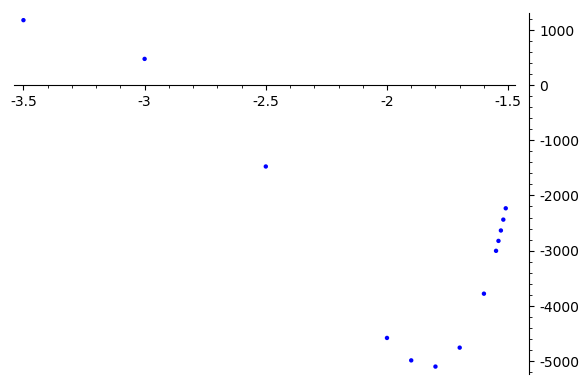

In [108]:
plot_data_rot_H_z = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

Ra = 0.150000000000000 Za = -1.51000000000000 rot_H_z = -15294.627558955626
Ra = 0.150000000000000 Za = -1.52000000000000 rot_H_z = -10353.031797131363
Ra = 0.150000000000000 Za = -1.53000000000000 rot_H_z = -5482.094608946027
Ra = 0.150000000000000 Za = -1.54000000000000 rot_H_z = -712.2151353562949
Ra = 0.150000000000000 Za = -1.55000000000000 rot_H_z = 3930.9574906402704
Ra = 0.150000000000000 Za = -1.60000000000000 rot_H_z = 24724.138342965307
Ra = 0.150000000000000 Za = -1.70000000000000 rot_H_z = 54171.271891860204
Ra = 0.150000000000000 Za = -1.80000000000000 rot_H_z = 71813.9811215652
Ra = 0.150000000000000 Za = -1.90000000000000 rot_H_z = 81215.85546437248
Ra = 0.150000000000000 Za = -2.00000000000000 rot_H_z = 84678.22632030025
Ra = 0.150000000000000 Za = -2.50000000000000 rot_H_z = 66894.89239830158
Ra = 0.150000000000000 Za = -3.00000000000000 rot_H_z = 44426.275531465624
Ra = 0.150000000000000 Za = -3.50000000000000 rot_H_z = 29599.709789260934


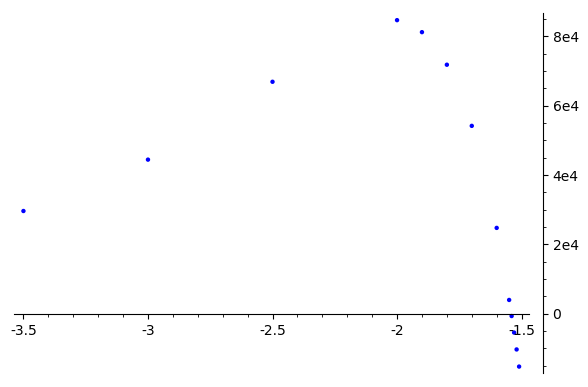

In [109]:
plot_data_rot_H_z = []

Ra = (Rj1) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

Ra = 0.0300000000000000 Za = -1.51000000000000 rot_H_z = -64556.19051216386
Ra = 0.0300000000000000 Za = -1.52000000000000 rot_H_z = -23836.47658232238
Ra = 0.0300000000000000 Za = -1.53000000000000 rot_H_z = 16524.568388064
Ra = 0.0300000000000000 Za = -1.54000000000000 rot_H_z = 56357.211717498736
Ra = 0.0300000000000000 Za = -1.55000000000000 rot_H_z = 95499.93842002223
Ra = 0.0300000000000000 Za = -1.60000000000000 rot_H_z = 276042.68796410505
Ra = 0.0300000000000000 Za = -1.70000000000000 rot_H_z = 531212.3306180928
Ra = 0.0300000000000000 Za = -1.80000000000000 rot_H_z = 647695.5612867128
Ra = 0.0300000000000000 Za = -1.90000000000000 rot_H_z = 673167.6460153533
Ra = 0.0300000000000000 Za = -2.00000000000000 rot_H_z = 651460.1204622554
Ra = 0.0300000000000000 Za = -2.50000000000000 rot_H_z = 416765.70300469577
Ra = 0.0300000000000000 Za = -3.00000000000000 rot_H_z = 254368.20703238697
Ra = 0.0300000000000000 Za = -3.50000000000000 rot_H_z = 162316.3878558584


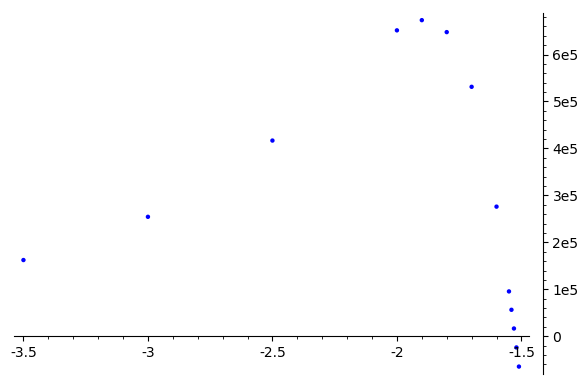

In [110]:
plot_data_rot_H_z = []

Ra = (Rj1) / 10
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]
    
list_plot(plot_data_rot_H_z)

Ra = 0.00300000000000000 Za = -1.51000000000000 rot_H_z = -577324.4462419559
Ra = 0.00300000000000000 Za = -1.52000000000000 rot_H_z = -94779.62128423362
Ra = 0.00300000000000000 Za = -1.53000000000000 rot_H_z = 382890.3673127374
Ra = 0.00300000000000000 Za = -1.54000000000000 rot_H_z = 853381.8527129984
Ra = 0.00300000000000000 Za = -1.55000000000000 rot_H_z = 1314516.0322562705
Ra = 0.00300000000000000 Za = -1.60000000000000 rot_H_z = 3416095.5812705546
Ra = 0.00300000000000000 Za = -1.70000000000000 rot_H_z = 6237613.843721201
Ra = 0.00300000000000000 Za = -1.80000000000000 rot_H_z = 7358813.076694183
Ra = 0.00300000000000000 Za = -1.90000000000000 rot_H_z = 7462543.5727471225
Ra = 0.00300000000000000 Za = -2.00000000000000 rot_H_z = 7091699.415046732
Ra = 0.00300000000000000 Za = -2.50000000000000 rot_H_z = 4343632.744408751
Ra = 0.00300000000000000 Za = -3.00000000000000 rot_H_z = 2608825.6704556267
Ra = 0.00300000000000000 Za = -3.50000000000000 rot_H_z = 1651234.185724633


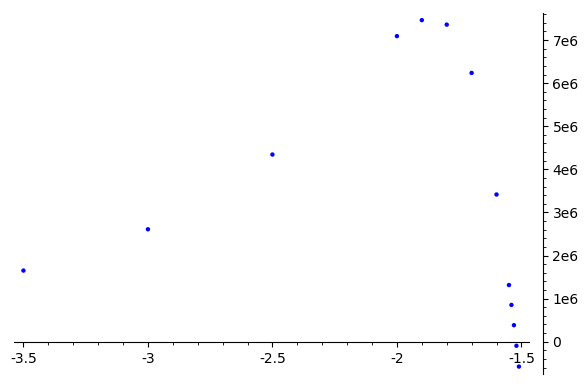

In [111]:
plot_data_rot_H_z = []

Ra = (Rj1) / 100
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]
    
list_plot(plot_data_rot_H_z)

Ra = 3.00000000000000 Za = -1.51000000000000 rot_H_z = 143.76703307366145
Ra = 3.00000000000000 Za = -1.52000000000000 rot_H_z = 137.0796713111541
Ra = 3.00000000000000 Za = -1.53000000000000 rot_H_z = 130.40054868647687
Ra = 3.00000000000000 Za = -1.54000000000000 rot_H_z = 123.7307663833647
Ra = 3.00000000000000 Za = -1.55000000000000 rot_H_z = 117.07142244760598
Ra = 3.00000000000000 Za = -1.60000000000000 rot_H_z = 83.96942616916786
Ra = 3.00000000000000 Za = -1.70000000000000 rot_H_z = 19.165093380043487
Ra = 3.00000000000000 Za = -1.80000000000000 rot_H_z = -42.930851948687206
Ra = 3.00000000000000 Za = -1.90000000000000 rot_H_z = -101.40762569140662
Ra = 3.00000000000000 Za = -2.00000000000000 rot_H_z = -155.49903017319235
Ra = 3.00000000000000 Za = -2.50000000000000 rot_H_z = -345.2974345513924
Ra = 3.00000000000000 Za = -3.00000000000000 rot_H_z = -402.67244046418324
Ra = 3.00000000000000 Za = -3.50000000000000 rot_H_z = -371.06266531042934


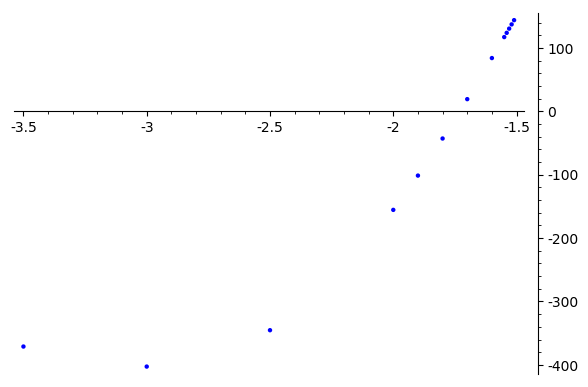

In [112]:
plot_data_rot_H_z = []

Ra = (Rj2) * 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

Ниже представлена процедура вычисления $r$-компоненты плотности тока смещения исходя из ротора напряженности магнитного поля

In [113]:
At2_diff_za_diff_za = lambda J, c, kappa, rj, ra, zj1, zj2, za : At2_diff_za (J, c, kappa, rj, ra, zj1, zj2, za).diff(za)

In [114]:
As2_diff_ra_diff_za = lambda J, c, kappa, rj1, rj2, ra, zj, za : As2_diff_ra (J, c, kappa, rj1, rj2, ra, zj, za).diff(za)

In [115]:
exec(preparse("At_diff_za_diff_za_subs_zj = lambda rj, ra, za : " + str(At2_diff_za_diff_za (J_d, c_d, kappa_d, rj, ra, Zj1, Zj2, za))))

In [116]:
exec(preparse("As_diff_ra_diff_za_subs_rj = lambda ra, zj, za : " + str(As2_diff_ra_diff_za (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za))))

In [117]:
exec(preparse("Av_diff_ra_diff_za = lambda J, c, kappa, rj, ra, zj, za : " + str(diff(Av_diff_ra(J, c, kappa, rj, ra, zj, za),za))))

In [118]:
AV_diff_ra_diff_za = lambda J, c, kappa, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra_diff_za(J, c, kappa, rj, ra, zj, za), rj1, rj2)

In [119]:
Av_diff_ra_diff_za_subs_rj = lambda ra, zj, za : AV_diff_ra_diff_za (J_d, c_d, kappa_d, Rj1, Rj2, ra, zj, za)

In [120]:
def calc_rot_H_r(Za, Ra):
    At_diff_za_subs_zj_diff_za_subs_za_ra = lambda rj : At_diff_za_diff_za_subs_zj(rj, Ra, Za)
    As_diff_ra_subs_rj_diff_za_subs_za_ra = lambda zj : As_diff_ra_diff_za_subs_rj(Ra, zj, Za)

    At_diff_za_diff_za_num_int = At_diff_za_subs_zj_diff_za_subs_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_diff_za_num_int = As_diff_ra_subs_rj_diff_za_subs_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_diff_za_num_int = num_int( lambda zj : Av_diff_ra_diff_za_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_diff_za_num_int = As_diff_ra_diff_za_num_int[0] + Av_diff_ra_diff_za_num_int

    rot_H_r = - At_diff_za_diff_za_num_int[0] + As_v_diff_ra_diff_za_num_int

    print ("Ra =", Ra, "Za =", Za, "rot_H_r =", rot_H_r)

    return rot_H_r

График $r$-компоненты плотности тока смещения (исходя из ротора напряженности магнитного поля) вне материала тороидально намагниченного цилиндра в зависимости от $z$ координаты для радиальной координаты центра тела тороида

Ra = 0.900000000000000 Za = -1.51000000000000 rot_H_r = 21558.664648161463
Ra = 0.900000000000000 Za = -1.52000000000000 rot_H_r = 21170.898727705102
Ra = 0.900000000000000 Za = -1.53000000000000 rot_H_r = 20781.63734834944
Ra = 0.900000000000000 Za = -1.54000000000000 rot_H_r = 20391.28152525348
Ra = 0.900000000000000 Za = -1.55000000000000 rot_H_r = 20000.2230434341
Ra = 0.900000000000000 Za = -1.60000000000000 rot_H_r = 18047.340759172595
Ra = 0.900000000000000 Za = -1.70000000000000 rot_H_r = 14279.371373636302
Ra = 0.900000000000000 Za = -1.80000000000000 rot_H_r = 10880.455690630555
Ra = 0.900000000000000 Za = -1.90000000000000 rot_H_r = 7961.175144253579
Ra = 0.900000000000000 Za = -2.00000000000000 rot_H_r = 5540.814794461279
Ra = 0.900000000000000 Za = -2.50000000000000 rot_H_r = -702.4793901049798
Ra = 0.900000000000000 Za = -3.00000000000000 rot_H_r = -1911.2920139825137
Ra = 0.900000000000000 Za = -3.50000000000000 rot_H_r = -1726.983889817824


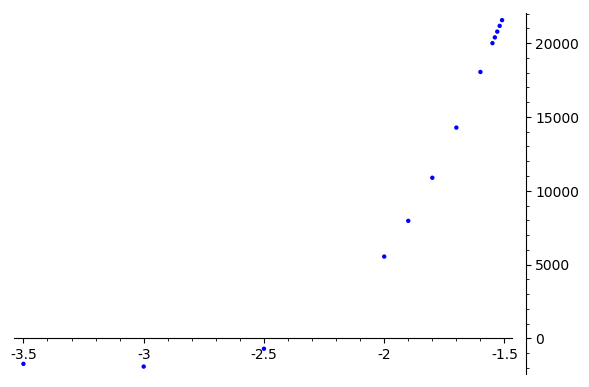

In [121]:
plot_data_rot_H_r = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_r = calc_rot_H_r(Za, Ra)
    plot_data_rot_H_r += [(Za, j_r)]

list_plot(plot_data_rot_H_r).show()

Теперь представляет интерес двумерная визуализация скалярного и векторного магнитного полей а также тока смещения (ротора $H$)

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

za_linspace = np.linspace(-3, 3, 20)
ra_linspace = np.linspace(0.1, 3, 9)

za_list = za_linspace.tolist()
ra_list = ra_linspace.tolist()

za_grid,ra_grid = np.meshgrid(za_linspace, ra_linspace)

u = za_grid * np.nan
v = ra_grid * np.nan
s = ra_grid * np.nan
s_t = ra_grid * np.nan
s_s = ra_grid * np.nan
h = ra_grid * np.nan
h_t = ra_grid * np.nan
h_s = ra_grid * np.nan

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Za = za_list[iz]
        Ra = ra_list[ir]
        u[ir][iz] = calc_rot_H_z(Za, Ra)
        v[ir][iz] = calc_rot_H_r(Za, Ra)
        
        h_scalar = calc_H_scalar(Za, Ra)
        s  [ir][iz] = h_scalar[0]
        s_t[ir][iz] = h_scalar[1]
        s_s[ir][iz] = h_scalar[2]
        
        h_phi = calc_H_phi(Za, Ra)
        h  [ir][iz] = h_phi[0]
        h_t[ir][iz] = h_phi[1]
        h_s[ir][iz] = h_phi[2]


Ra = 0.1 Za = -3.0 rot_H_z = 70840.29725479198
Ra = 0.1 Za = -3.0 rot_H_r = -6961.254951006282
Ra = 0.1 Za = -3.0 H_scalar_t = -115517.8366692968
Ra = 0.1 Za = -3.0 H_scalar_sv = 4684.76946525522
Ra = 0.1 Za = -3.0 H_scalar = -110833.06720404158
Ra = 0.1 Za = -3.0 H_phi_t = 7824.669158774681
Ra = 0.1 Za = -3.0 H_phi_sv = -349.1571703234055
Ra = 0.1 Za = -3.0 H_phi = 7475.511988451275
Ra = 0.4625 Za = -3.0 rot_H_z = 8242.782467203826
Ra = 0.4625 Za = -3.0 rot_H_r = -4408.263005530712
Ra = 0.4625 Za = -3.0 H_scalar_t = -22546.29737722989
Ra = 0.4625 Za = -3.0 H_scalar_sv = 4075.169080273909
Ra = 0.4625 Za = -3.0 H_scalar = -18471.12829695598
Ra = 0.4625 Za = -3.0 H_phi_t = 7367.054915342668
Ra = 0.4625 Za = -3.0 H_phi_sv = -1460.275990841295
Ra = 0.4625 Za = -3.0 H_phi = 5906.778924501374
Ra = 0.825 Za = -3.0 rot_H_z = 1093.4046900485514
Ra = 0.825 Za = -3.0 rot_H_r = -2266.5938542474078
Ra = 0.825 Za = -3.0 H_scalar_t = -9870.145576634279
Ra = 0.825 Za = -3.0 H_scalar_sv = 2955.17085480

Ra = 0.1 Za = -2.3684210526315788 rot_H_z = 123896.48430614715
Ra = 0.1 Za = -2.3684210526315788 rot_H_r = -13023.264126194717
Ra = 0.1 Za = -2.3684210526315788 H_scalar_t = -184407.2781791501
Ra = 0.1 Za = -2.3684210526315788 H_scalar_sv = 13464.06059637309
Ra = 0.1 Za = -2.3684210526315788 H_scalar = -170943.21758277703
Ra = 0.1 Za = -2.3684210526315788 H_phi_t = 15016.17121858327
Ra = 0.1 Za = -2.3684210526315788 H_phi_sv = -1284.08274304156
Ra = 0.1 Za = -2.3684210526315788 H_phi = 13732.08847554171
Ra = 0.4625 Za = -2.3684210526315788 rot_H_z = 7786.690730743219
Ra = 0.4625 Za = -2.3684210526315788 rot_H_r = -4615.601152882411
Ra = 0.4625 Za = -2.3684210526315788 H_scalar_t = -34583.83331653181
Ra = 0.4625 Za = -2.3684210526315788 H_scalar_sv = 10731.03923709624
Ra = 0.4625 Za = -2.3684210526315788 H_scalar = -23852.79407943557
Ra = 0.4625 Za = -2.3684210526315788 H_phi_t = 14092.62532790906
Ra = 0.4625 Za = -2.3684210526315788 H_phi_sv = -5044.074447442892
Ra = 0.4625 Za = -2.368

Ra = 2.6375 Za = -2.0526315789473686 rot_H_z = -370.2223014715921
Ra = 2.6375 Za = -2.0526315789473686 rot_H_r = 1254.3798787591431
Ra = 2.6375 Za = -2.0526315789473686 H_scalar_t = 1903.984558641487
Ra = 2.6375 Za = -2.0526315789473686 H_scalar_sv = -915.9200581073264
Ra = 2.6375 Za = -2.0526315789473686 H_scalar = 988.0645005341605
Ra = 2.6375 Za = -2.0526315789473686 H_phi_t = -73.69763408549423
Ra = 2.6375 Za = -2.0526315789473686 H_phi_sv = -390.6417091559706
Ra = 2.6375 Za = -2.0526315789473686 H_phi = -464.3393432414648
Ra = 3.0 Za = -2.0526315789473686 rot_H_z = -181.99708475603234
Ra = 3.0 Za = -2.0526315789473686 rot_H_r = 908.3003785099494
Ra = 3.0 Za = -2.0526315789473686 H_scalar_t = 1457.545763726704
Ra = 3.0 Za = -2.0526315789473686 H_scalar_sv = -645.2567674765187
Ra = 3.0 Za = -2.0526315789473686 H_scalar = 812.2889962501854
Ra = 3.0 Za = -2.0526315789473686 H_phi_t = -352.2163125404048
Ra = 3.0 Za = -2.0526315789473686 H_phi_sv = -146.2720420891337
Ra = 3.0 Za = -2.05

Ra = 1.9125 Za = -1.4210526315789473 rot_H_z = 117.07068317531207
Ra = 1.9125 Za = -1.4210526315789473 rot_H_r = 3473.2976600763523
Ra = 1.9125 Za = -1.4210526315789473 H_scalar_t = 5537.946090174767
Ra = 1.9125 Za = -1.4210526315789473 H_scalar_sv = -3840.424361124416
Ra = 1.9125 Za = -1.4210526315789473 H_scalar = 1697.521729050351
Ra = 1.9125 Za = -1.4210526315789473 H_phi_t = -3076.364864226714
Ra = 1.9125 Za = -1.4210526315789473 H_phi_sv = 1077.055704836724
Ra = 1.9125 Za = -1.4210526315789473 H_phi = -1999.3091593899899
Ra = 2.275 Za = -1.4210526315789473 rot_H_z = 175.95918554412572
Ra = 2.275 Za = -1.4210526315789473 rot_H_r = 2169.9427407534454
Ra = 2.275 Za = -1.4210526315789473 H_scalar_t = 3340.536374192166
Ra = 2.275 Za = -1.4210526315789473 H_scalar_sv = -1982.715695563708
Ra = 2.275 Za = -1.4210526315789473 H_scalar = 1357.820678628458
Ra = 2.275 Za = -1.4210526315789473 H_phi_t = -2251.270368827421
Ra = 2.275 Za = -1.4210526315789473 H_phi_sv = 620.4094001852238
Ra = 2

Ra = 1.1875 Za = -0.7894736842105265 rot_H_z = 1282.033189121469
Ra = 1.1875 Za = -0.7894736842105265 rot_H_r = 3225.170054874684
Ra = 1.1875 Za = -0.7894736842105265 H_scalar_t = -1496.861196758697
Ra = 1.1875 Za = -0.7894736842105265 H_scalar_sv = 1847.215747638137
Ra = 1.1875 Za = -0.7894736842105265 H_scalar = 350.35455087944
Ra = 1.1875 Za = -0.7894736842105265 H_phi_t = -15656.74981183177
Ra = 1.1875 Za = -0.7894736842105265 H_phi_sv = -38260.50564454473
Ra = 1.1875 Za = -0.7894736842105265 H_phi = -53917.2554563765
Ra = 1.55 Za = -0.7894736842105265 rot_H_z = 1610.9182632732504
Ra = 1.55 Za = -0.7894736842105265 rot_H_r = 2735.822145091542
Ra = 1.55 Za = -0.7894736842105265 H_scalar_t = 1901.784825415287
Ra = 1.55 Za = -0.7894736842105265 H_scalar_sv = -739.3629672941852
Ra = 1.55 Za = -0.7894736842105265 H_scalar = 1162.4218581211019
Ra = 1.55 Za = -0.7894736842105265 H_phi_t = -10788.87372632059
Ra = 1.55 Za = -0.7894736842105265 H_phi_sv = 5486.076121327125
Ra = 1.55 Za = -0.

Ra = 0.1 Za = -0.1578947368421053 H_phi_t = -18939.87929318494
Ra = 0.1 Za = -0.1578947368421053 H_phi_sv = 752.5771999178301
Ra = 0.1 Za = -0.1578947368421053 H_phi = -18187.30209326711
Ra = 0.4625 Za = -0.1578947368421053 rot_H_z = -22361.340572099703
Ra = 0.4625 Za = -0.1578947368421053 rot_H_r = -1036.447436676764
Ra = 0.4625 Za = -0.1578947368421053 H_scalar_t = -5409.21014814208
Ra = 0.4625 Za = -0.1578947368421053 H_scalar_sv = 1867.884474893061
Ra = 0.4625 Za = -0.1578947368421053 H_scalar = -3541.3256732490186
Ra = 0.4625 Za = -0.1578947368421053 H_phi_t = -17965.86465164925
Ra = 0.4625 Za = -0.1578947368421053 H_phi_sv = -115858.7796940102
Ra = 0.4625 Za = -0.1578947368421053 H_phi = -133824.64434565944
Ra = 0.825 Za = -0.1578947368421053 rot_H_z = -4970.008712905417
Ra = 0.825 Za = -0.1578947368421053 rot_H_r = -74.21422932983205
Ra = 0.825 Za = -0.1578947368421053 H_scalar_t = -1943.953441003046
Ra = 0.825 Za = -0.1578947368421053 H_scalar_sv = 1145.025079215312
Ra = 0.825 

Ra = 2.6375 Za = 0.1578947368421053 H_phi_t = -4008.490376353325
Ra = 2.6375 Za = 0.1578947368421053 H_phi_sv = 1491.79656578701
Ra = 2.6375 Za = 0.1578947368421053 H_phi = -2516.693810566315
Ra = 3.0 Za = 0.1578947368421053 rot_H_z = 761.4181247000565
Ra = 3.0 Za = 0.1578947368421053 rot_H_r = -146.06633457017853
Ra = 3.0 Za = 0.1578947368421053 H_scalar_t = -229.4546949314165
Ra = 3.0 Za = 0.1578947368421053 H_scalar_sv = 108.4303112030058
Ra = 3.0 Za = 0.1578947368421053 H_scalar = -121.0243837284107
Ra = 3.0 Za = 0.1578947368421053 H_phi_t = -2950.177173021184
Ra = 3.0 Za = 0.1578947368421053 H_phi_sv = 1035.740034805006
Ra = 3.0 Za = 0.1578947368421053 H_phi = -1914.437138216178
Ra = 0.1 Za = 0.4736842105263155 rot_H_z = -186500.05727567174
Ra = 0.1 Za = 0.4736842105263155 rot_H_r = 7736.105843607775
Ra = 0.1 Za = 0.4736842105263155 H_scalar_t = 91542.90769119897
Ra = 0.1 Za = 0.4736842105263155 H_scalar_sv = -7824.894240198861
Ra = 0.1 Za = 0.4736842105263155 H_scalar = 83718.013

Ra = 1.9125 Za = 0.7894736842105261 H_phi_t = -7054.095324190079
Ra = 1.9125 Za = 0.7894736842105261 H_phi_sv = 3243.034981706614
Ra = 1.9125 Za = 0.7894736842105261 H_phi = -3811.060342483465
Ra = 2.275 Za = 0.7894736842105261 rot_H_z = 1012.5938960712288
Ra = 2.275 Za = 0.7894736842105261 rot_H_r = -1434.6715203939348
Ra = 2.275 Za = 0.7894736842105261 H_scalar_t = -2033.643623122509
Ra = 2.275 Za = 0.7894736842105261 H_scalar_sv = 1081.205870002061
Ra = 2.275 Za = 0.7894736842105261 H_scalar = -952.4377531204482
Ra = 2.275 Za = 0.7894736842105261 H_phi_t = -4751.327900958331
Ra = 2.275 Za = 0.7894736842105261 H_phi_sv = 1935.591533525188
Ra = 2.275 Za = 0.7894736842105261 H_phi = -2815.736367433143
Ra = 2.6375 Za = 0.7894736842105261 rot_H_z = 763.7880372575748
Ra = 2.6375 Za = 0.7894736842105261 rot_H_r = -985.1143891610217
Ra = 2.6375 Za = 0.7894736842105261 H_scalar_t = -1498.500397626447
Ra = 2.6375 Za = 0.7894736842105261 H_scalar_sv = 763.1392908081565
Ra = 2.6375 Za = 0.78947

Ra = 1.1875 Za = 1.421052631578947 H_phi_t = -24130.63173009882
Ra = 1.1875 Za = 1.421052631578947 H_phi_sv = -25488.44332871318
Ra = 1.1875 Za = 1.421052631578947 H_phi = -49619.075058812
Ra = 1.55 Za = 1.421052631578947 rot_H_z = 110.79078483959893
Ra = 1.55 Za = 1.421052631578947 rot_H_r = -6064.961534637332
Ra = 1.55 Za = 1.421052631578947 H_scalar_t = -12512.29850575071
Ra = 1.55 Za = 1.421052631578947 H_scalar_sv = 10612.55917423507
Ra = 1.55 Za = 1.421052631578947 H_scalar = -1899.7393315156405
Ra = 1.55 Za = 1.421052631578947 H_phi_t = -8415.339901346657
Ra = 1.55 Za = 1.421052631578947 H_phi_sv = 5908.709647151783
Ra = 1.55 Za = 1.421052631578947 H_phi = -2506.6302541948735
Ra = 1.9125 Za = 1.421052631578947 rot_H_z = 117.07068317533913
Ra = 1.9125 Za = 1.421052631578947 rot_H_r = -3473.2976600763996
Ra = 1.9125 Za = 1.421052631578947 H_scalar_t = -5537.946090174765
Ra = 1.9125 Za = 1.421052631578947 H_scalar_sv = 3840.424361124415
Ra = 1.9125 Za = 1.421052631578947 H_scalar =

Ra = 0.4625 Za = 2.052631578947368 H_phi_t = 20381.72451954798
Ra = 0.4625 Za = 2.052631578947368 H_phi_sv = -10558.62435865469
Ra = 0.4625 Za = 2.052631578947368 H_phi = 9823.100160893291
Ra = 0.825 Za = 2.052631578947368 rot_H_z = -4213.390595823898
Ra = 0.825 Za = 2.052631578947368 rot_H_r = -4337.402510081753
Ra = 0.825 Za = 2.052631578947368 H_scalar_t = 15239.50784190207
Ra = 0.825 Za = 2.052631578947368 H_scalar_sv = -9299.142827899395
Ra = 0.825 Za = 2.052631578947368 H_scalar = 5940.365014002675
Ra = 0.825 Za = 2.052631578947368 H_phi_t = 16626.63931635412
Ra = 0.825 Za = 2.052631578947368 H_phi_sv = -11754.73443681839
Ra = 0.825 Za = 2.052631578947368 H_phi = 4871.904879535732
Ra = 1.1875 Za = 2.052631578947368 rot_H_z = -3601.174182342788
Ra = 1.1875 Za = 2.052631578947368 rot_H_r = -4189.07205579907
Ra = 1.1875 Za = 2.052631578947368 H_scalar_t = 2937.724243325903
Ra = 1.1875 Za = 2.052631578947368 H_scalar_sv = -2331.303956684616
Ra = 1.1875 Za = 2.052631578947368 H_scalar

Ra = 3.0 Za = 2.3684210526315788 H_phi_t = 68.18655308099856
Ra = 3.0 Za = 2.3684210526315788 H_phi_sv = -299.6002960022146
Ra = 3.0 Za = 2.3684210526315788 H_phi = -231.413742921216
Ra = 0.1 Za = 2.6842105263157894 rot_H_z = 94024.37724907022
Ra = 0.1 Za = 2.6842105263157894 rot_H_r = 9835.445755559622
Ra = 0.1 Za = 2.6842105263157894 H_scalar_t = 144372.9269294641
Ra = 0.1 Za = 2.6842105263157894 H_scalar_sv = -7691.92730435916
Ra = 0.1 Za = 2.6842105263157894 H_scalar = 136680.99962510495
Ra = 0.1 Za = 2.6842105263157894 H_phi_t = 10749.6908629813
Ra = 0.1 Za = 2.6842105263157894 H_phi_sv = -643.8519861733013
Ra = 0.1 Za = 2.6842105263157894 H_phi = 10105.838876807999
Ra = 0.4625 Za = 2.6842105263157894 rot_H_z = 8766.816025652635
Ra = 0.4625 Za = 2.6842105263157894 rot_H_r = 5185.735471691763
Ra = 0.4625 Za = 2.6842105263157894 H_scalar_t = 27635.94589908056
Ra = 0.4625 Za = 2.6842105263157894 H_scalar_sv = -6456.412112259115
Ra = 0.4625 Za = 2.6842105263157894 H_scalar = 21179.533

Ra = 3.0 Za = 3.0 H_phi_t = 556.871582184837
Ra = 3.0 Za = 3.0 H_phi_sv = -397.8329146176903
Ra = 3.0 Za = 3.0 H_phi = 159.03866756714677


In [123]:
line_thick = 0.005
arr_l = 0.15
arr_h = 0.025
color = "red"

def matplotlib_draw_cylinder(plt, z0 = 0):
    plt.plot(z0 + Zj1,      Rj2                 , z0 + Zj2,Rj2, marker='.', color = color)
    plt.plot(z0 + Zj2,      Rj2                 , z0 + Zj2,Rj1, marker='.', color = color, linestyle="dashed")
    plt.plot(z0 + Zj2,      Rj1                 , z0 + Zj1,Rj1, marker='.', color = color)
    plt.plot(z0 + Zj1,      Rj1                 , z0 + Zj1,Rj2, marker='.', color = color, linestyle="dashed")

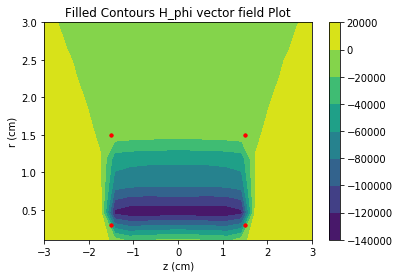

In [124]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, h)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours H_phi vector field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

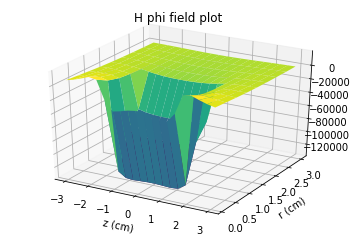

In [125]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, h, cmap='viridis', edgecolor='none')
ax.set_title('H phi field plot')
plt.show()

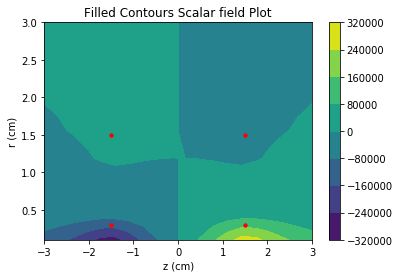

In [126]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

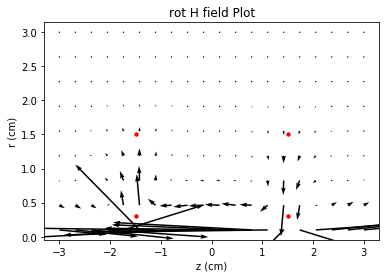

In [127]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u,v)
ax.set_title('rot H field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

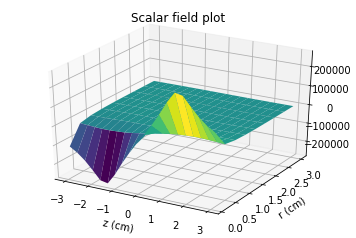

In [128]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, s, cmap='viridis', edgecolor='none')
ax.set_title('Scalar field plot')
plt.show()

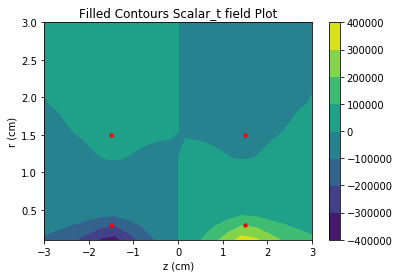

In [129]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_t)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar_t field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

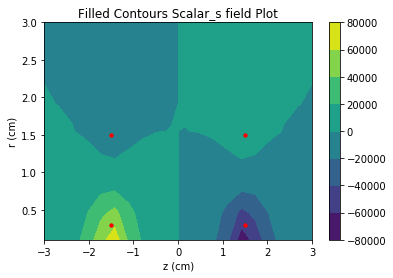

In [130]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_s)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar_s field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [131]:
u_ex = u
v_ex = v
s_ex = s
h_ex = h

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Za = za_list[iz]
        Ra = ra_list[ir]
        if Za >= Zj1 and Za <= Zj2 and Ra >= Rj1 and Ra <= Rj2:
            u_ex[ir][iz] = np.nan
            v_ex[ir][iz] = np.nan
            s_ex[ir][iz] = np.nan
            h_ex[ir][iz] = np.nan

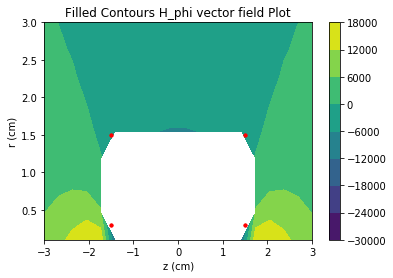

In [132]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, h_ex)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours H_phi vector field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


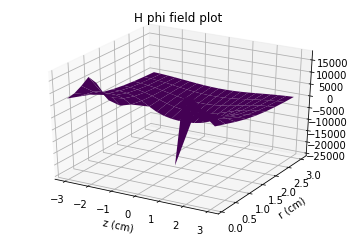

In [133]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, h_ex, cmap='viridis', edgecolor='none')
ax.set_title('H phi field plot')
plt.show()

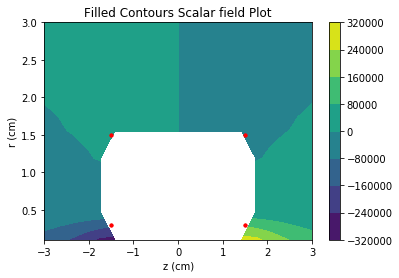

In [134]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_ex)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

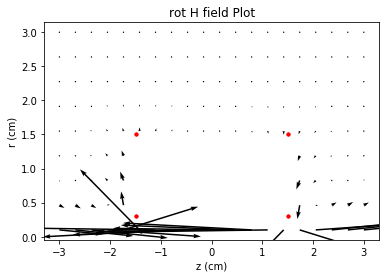

In [135]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u_ex,v_ex)
ax.set_title('rot H field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


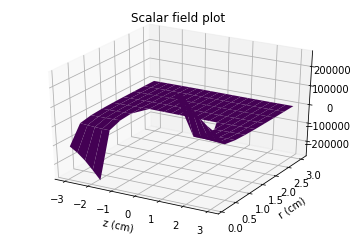

In [136]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, s_ex, cmap='viridis', edgecolor='none')
ax.set_title('Scalar field plot')
plt.show()

In [137]:
u_norm = u
v_norm = v

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        n = sqrt(u[ir][iz]^2 + v[ir][iz]^2)
        u_norm[ir][iz] = u[ir][iz] / n
        v_norm[ir][iz] = v[ir][iz] / n

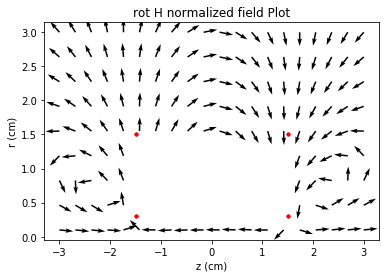

In [138]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u_norm,v_norm)
ax.set_title('rot H normalized field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

# Парадокс тороидально намагниченного цилиндра

Удивительным для меня образом я получил отличную от нуля дивергенцию векторного потенциала, хотя, например, в курсе электродинамики Тамма доказывается, что для замкнутых постоянных токов таковая должна быть равна нулю.

Доказательство Тамма равенства нулю дивергенции векторного потенциала для замкнутых систем постоянного тока (И.Е.Тамм, Основы теории электричества, 1957, $\$46$ п.5)

Исходя из уравнения

$$\vec{A} = \frac{1}{c}\,\int\frac{\vec{j}}{R}dV$$

которое в свою очередь получено из уравнения 

$$\vec{H} = \frac{1}{c}\,\int\frac{\left[\vec{j}\vec{R}\right]}{R}dV$$

следует

$$div\,\vec{A} = \frac{1}{c}\,div_{a}\,\int\frac{\vec{j}dV}{R}$$
где индекс $a$ у знака дивергенции означает, что пространственное дифференцирование производится по координатам точки наблюдения. Порядок интегрирования по объёму токов и дифференцирования по точке наблюдения может быть заменён на обратный. Стало быть,

$$div\,\vec{A} = \frac{1}{c}\,\int\,div_{a}\left(\frac{\vec{j}}{R}\right)dV$$

Применяя уравнение векторного анализа $div\left(\phi\,\vec{a} \right) = \phi\,div\,\vec{a} + \vec{a}\, grad\,\phi$ можем написать:

$$div_{a}\left(\frac{\vec{j}}{R}\right) = \frac{1}{R}\,div_{a}\,\vec{j} + \vec{j}\,grad_{a}\, \left(\frac{1}{R}\right) = \vec{j}\,grad_{a}\, \left(\frac{1}{R}\right)$$

Поскольку значение $\vec{j}$ от координат точки наблюдения не зависит $div_{a}\,\vec{j}\,=\,0$. С другой стороны, воспользовавшись формулой $grad_{q}\left(\frac{1}{R}\right) = \frac{\vec{R}}{R^3} = -\,grad_{a}\left(\frac{1}{R}\right)$ и пременив затем вторично формулу дивергенции произведения скаляра на вектор, получим:

$$\vec{j}\,grad_{a}\left(\frac{1}{R}\right) = -\,\vec{j}\,grad_{q}\left(\frac{1}{R}\right) = -\,div_{q}\left(\frac{\vec{j}}{R}\right) + \frac{1}{R}\,div_{q}\,\vec{j}$$

Последний член снова равен нулю, ибо дивергенция $\vec{j}$ равна нулю. Стало быть окончательно:

$$div_{a}\left(\frac{\vec{j}}{R}\right) = -\,div_{q}\left(\frac{\vec{j}}{R}\right)$$

$$div\,\vec{A} = -\,\frac{1}{c}\,\int\,div_{q}\left(\frac{\vec{j}}{R}\right)dV$$

Последний интеграл можно преобразовать по теореме Гаусса, ибо пространственное дифференцирование под знаком интеграла производится по тем же координатам точек истока как и интегрирование. Следовательно,

$$div\,\vec{A} = -\,\frac{1}{c}\,\oint\,\frac{j_{n}}{R}\,dS$$

причём интегрирование должно быть распространено по поверхности всех обтекаемых током проводников. Но на поверхности проводников

$$\vec{j_n} = 0$$

следовательно,

$$div\,\vec{A} = 0$$

Что противоречит полученному в данной работе результату.
